# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# Exploratory Data Analysis

## Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Loading Dataset

In [2]:
df=pd.read_csv("HR_Dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Insights

In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [6]:
df.duplicated().sum()

3008

In [7]:
#df.drop_duplicates(keep = 'first', inplace = True)
#df.shape

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


## Examining Features 

**left**

In [9]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

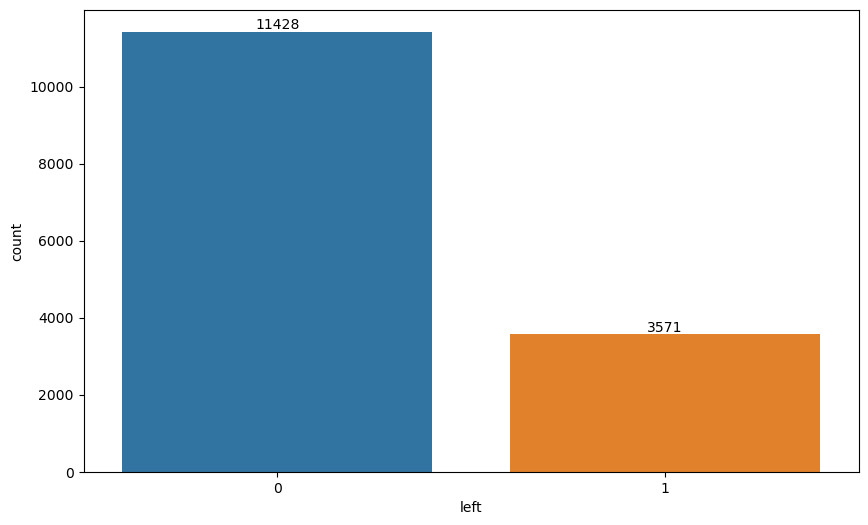

In [10]:
fig, ax = plt.subplots()

ax = sns.countplot(data=df, x="left")

for container in ax.containers:
    ax.bar_label(container);

In [11]:
df.left.value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

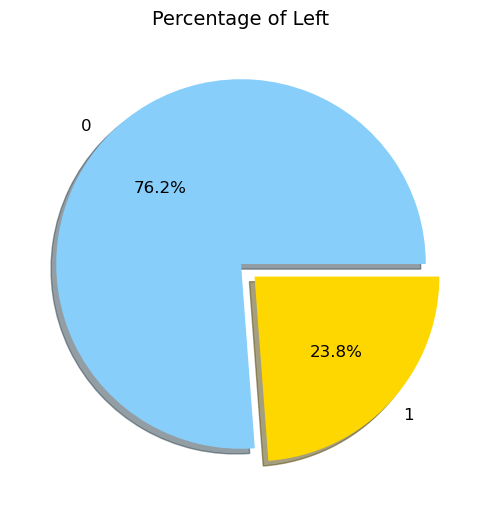

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=df.left.value_counts().values, 
       labels=[0,1], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
       )
plt.title("Percentage of Left", fontdict = {'fontsize': 14})
plt.show()

In [13]:
df[df["left"]==1].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000
mean,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321
std,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.0,0.072759
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [14]:
df[df["left"]==0].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.0,11428.000000
mean,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
std,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.0,0.159889
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


**satisfaction_level**

In [15]:
df.satisfaction_level.describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [16]:
df.groupby("left")["satisfaction_level"].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,0.666810,0.217104,0.12,0.54,0.69,0.84,1.00
1,3571.0,0.440098,0.263933,0.09,0.13,0.41,0.73,0.92


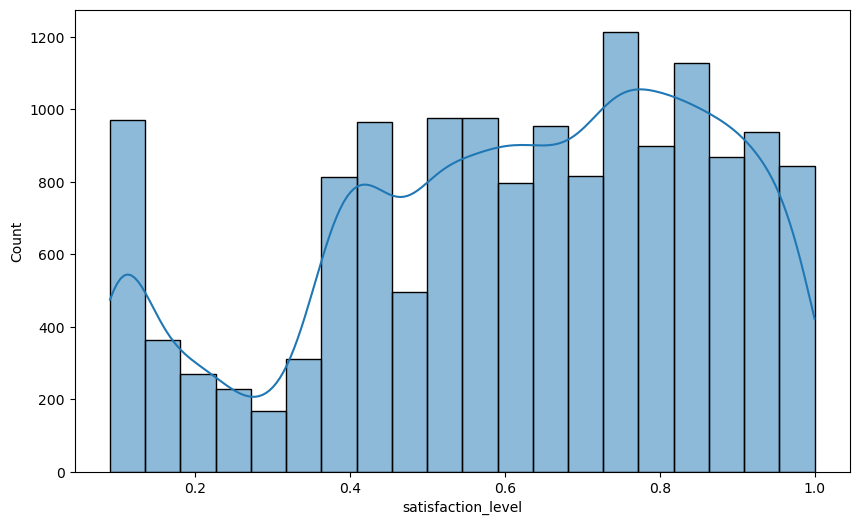

In [17]:
sns.histplot(data=df, x="satisfaction_level", bins=20, kde=True);

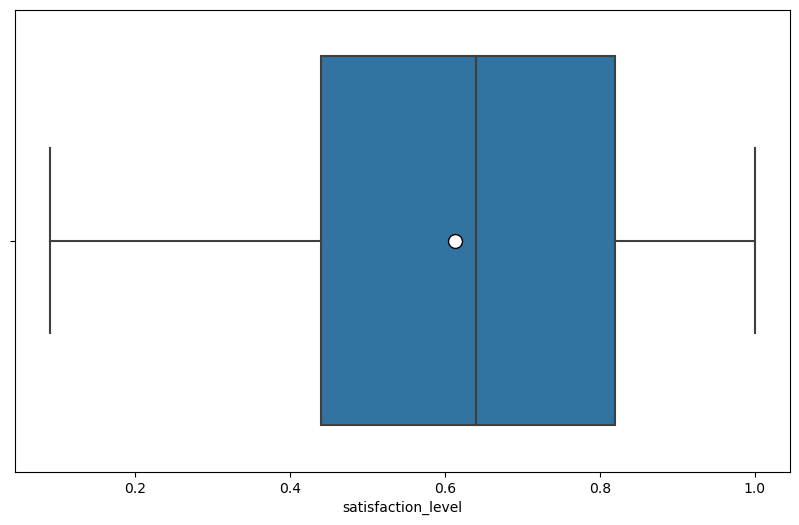

In [18]:
sns.boxplot(data=df, 
            x="satisfaction_level",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

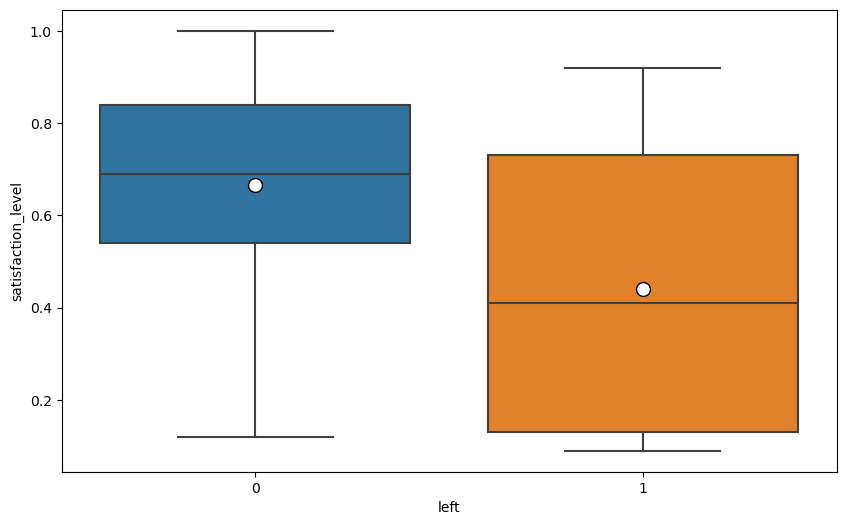

In [19]:
sns.boxplot(data=df, 
            y="satisfaction_level", 
            x="left",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

**last_evaluation**

In [20]:
df.last_evaluation.describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

In [21]:
df.groupby("left")["last_evaluation"].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,0.715473,0.162005,0.36,0.58,0.71,0.85,1.0
1,3571.0,0.718113,0.197673,0.45,0.52,0.79,0.90,1.0


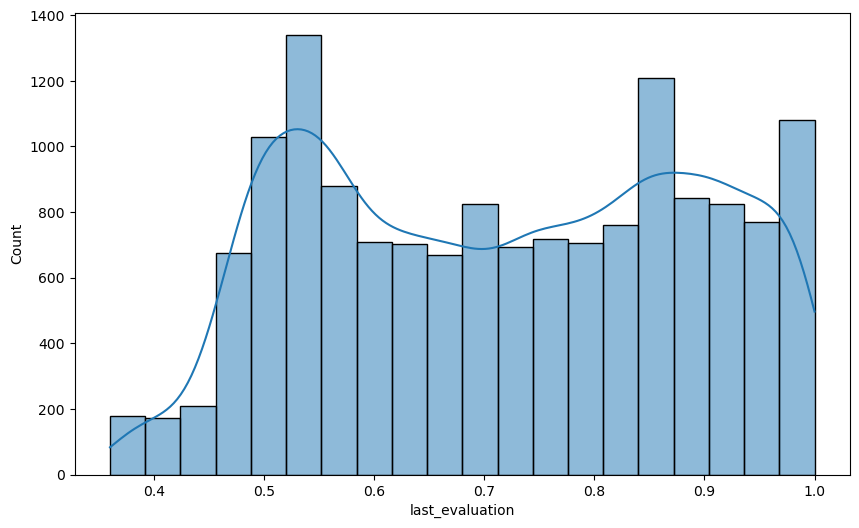

In [22]:
sns.histplot(data=df, x="last_evaluation", bins=20, kde=True);

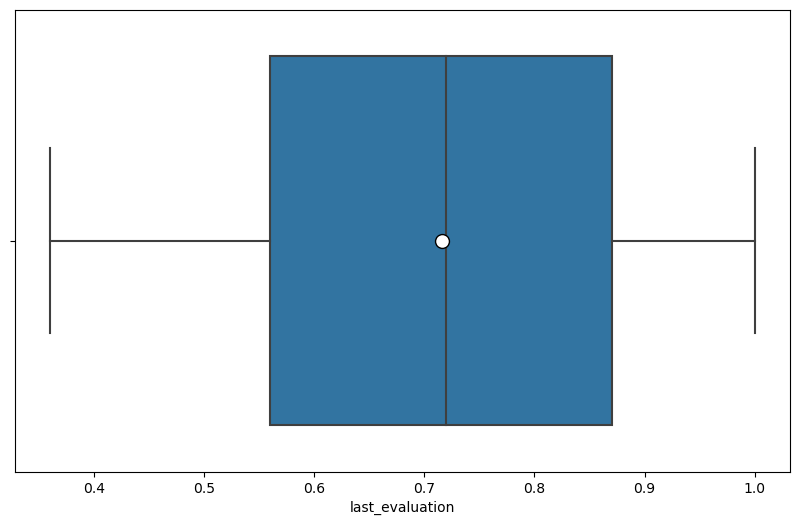

In [23]:
sns.boxplot(data=df, 
            x="last_evaluation",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

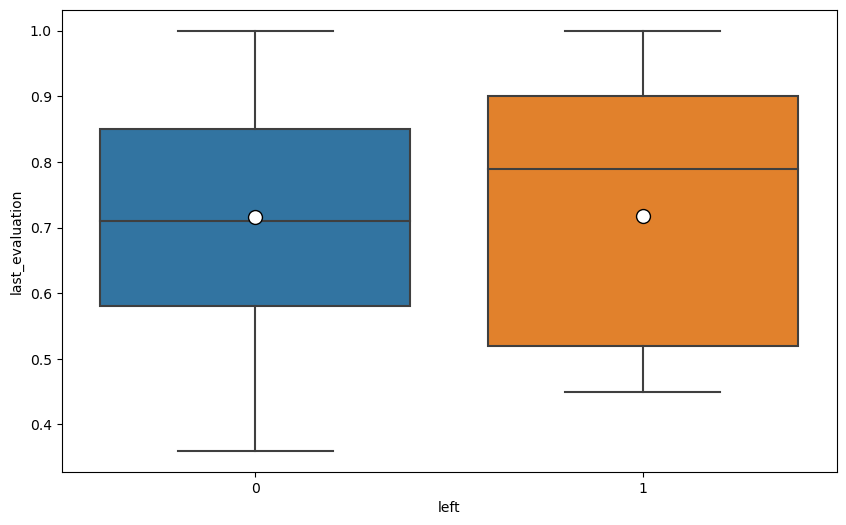

In [24]:
sns.boxplot(data=df, 
            y="last_evaluation", 
            x="left",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

**number_project**

In [25]:
df.number_project.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

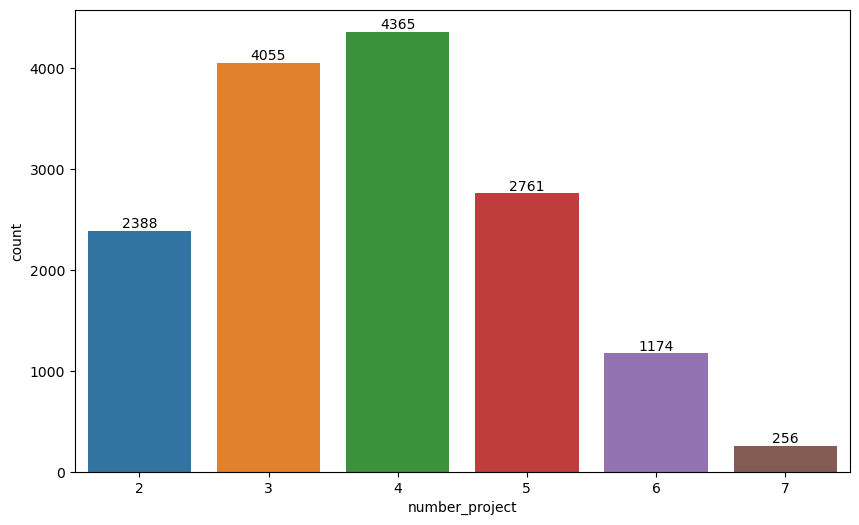

In [26]:
ax=sns.countplot(x=df.number_project)
ax.bar_label(ax.containers[0]);

In [27]:
df.groupby("left")["number_project"].value_counts()

left  number_project
0     3                 3983
      4                 3956
      5                 2149
      2                  821
      6                  519
1     2                 1567
      6                  655
      5                  612
      4                  409
      7                  256
      3                   72
Name: number_project, dtype: int64

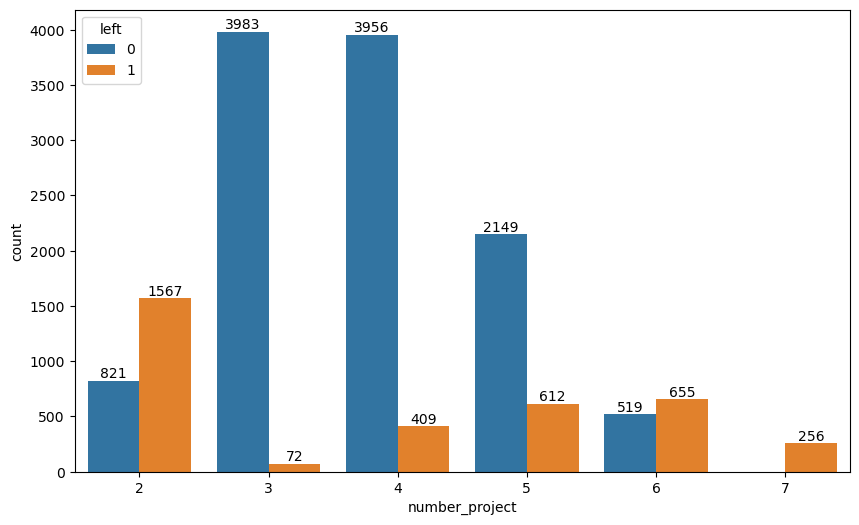

In [28]:
ax=sns.countplot(x=df.number_project, hue=df.left)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

In [29]:
df.number_project.describe()

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

In [30]:
df.groupby("left")["number_project"].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,3.786664,0.979884,2.0,3.0,4.0,4.0,6.0
1,3571.0,3.855503,1.818165,2.0,2.0,4.0,6.0,7.0


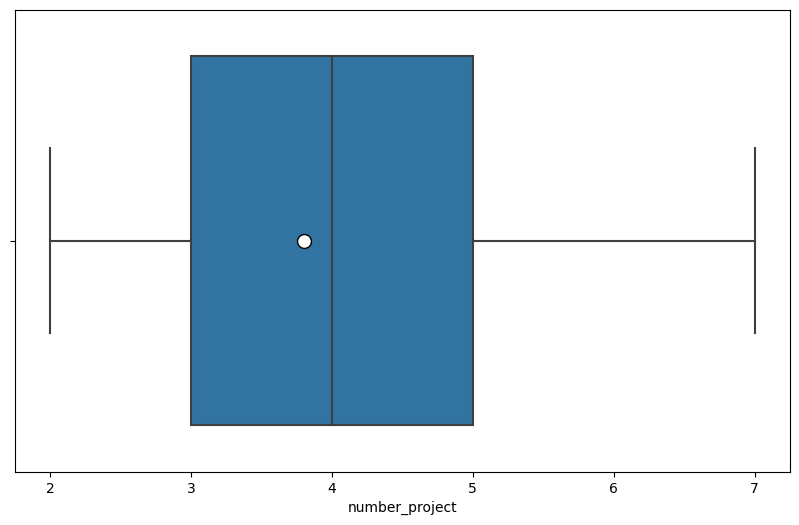

In [31]:
sns.boxplot(data=df, 
            x="number_project",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

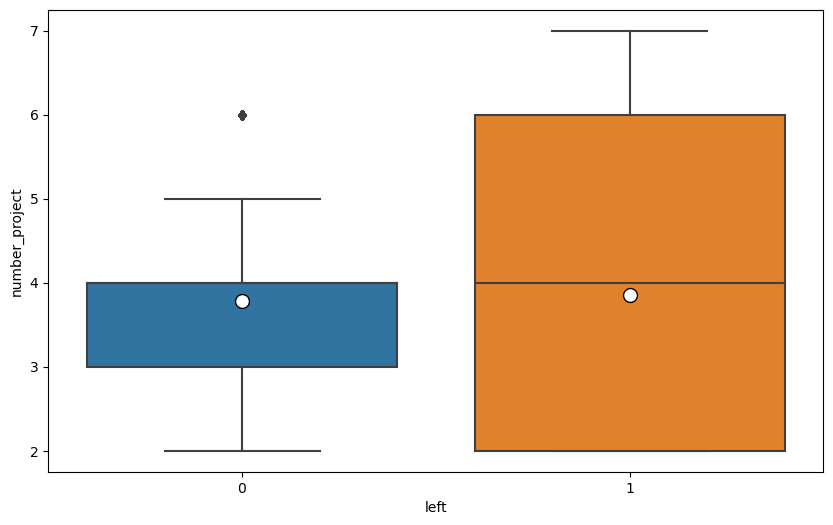

In [32]:
sns.boxplot(data=df, 
            y="number_project", 
            x="left",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

**average_montly_hours**

In [33]:
df.average_montly_hours.describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [34]:
df.groupby("left")["average_montly_hours"].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,199.060203,45.682731,96.0,162.0,198.0,238.0,287.0
1,3571.0,207.419210,61.202825,126.0,146.0,224.0,262.0,310.0


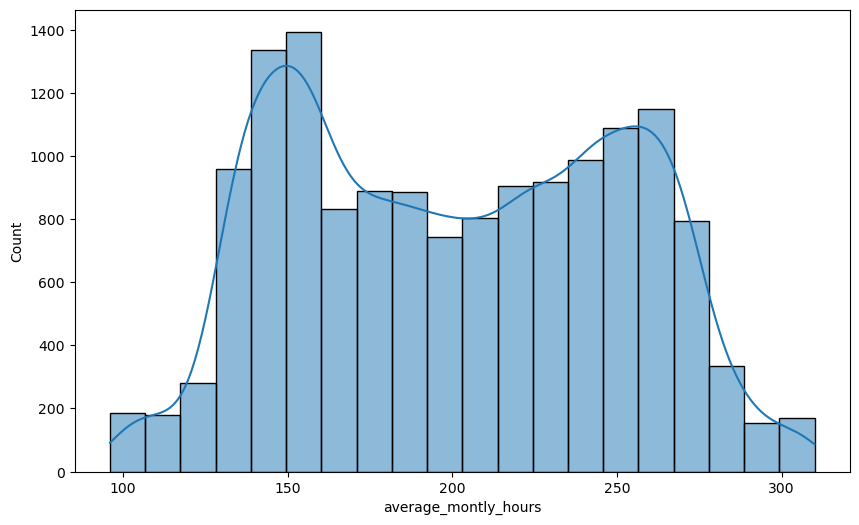

In [35]:
sns.histplot(data=df, x="average_montly_hours", bins=20, kde=True);

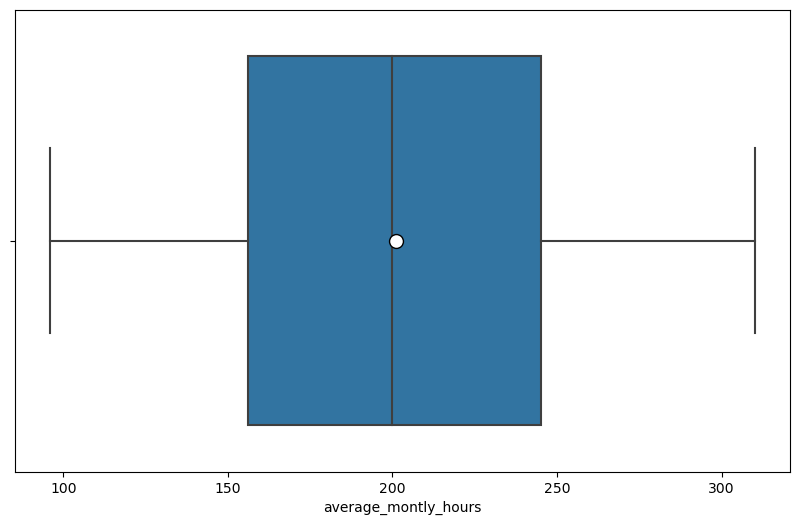

In [36]:
sns.boxplot(data=df, 
            x="average_montly_hours",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

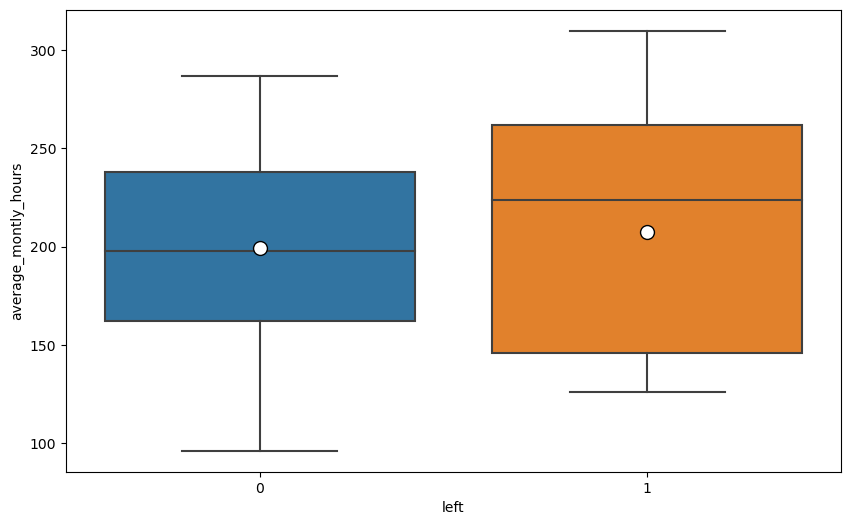

In [37]:
sns.boxplot(data=df, 
            y="average_montly_hours", 
            x="left",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

**time_spend_company**

In [38]:
df.time_spend_company.value_counts().sort_values(ascending=False)

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

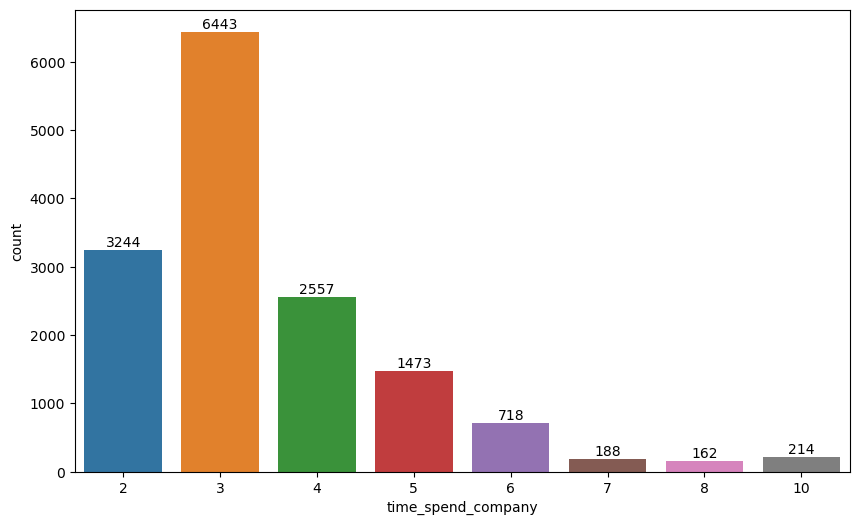

In [39]:
ax=sns.countplot(x=df.time_spend_company)
ax.bar_label(ax.containers[0]);

In [40]:
df.groupby("left")["time_spend_company"].value_counts()

left  time_spend_company
0     3                     4857
      2                     3191
      4                     1667
      5                      640
      6                      509
      10                     214
      7                      188
      8                      162
1     3                     1586
      4                      890
      5                      833
      6                      209
      2                       53
Name: time_spend_company, dtype: int64

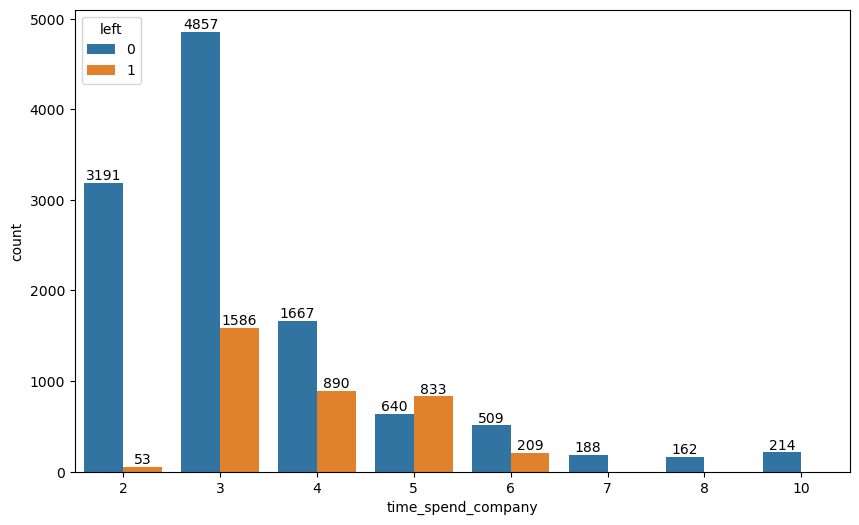

In [41]:
ax=sns.countplot(x=df.time_spend_company, hue=df.left)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

In [42]:
df.time_spend_company.describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

In [43]:
df.groupby("left")["time_spend_company"].describe()

,count,mean,std,min,25%,50%,75%,max
left,,,,,,,,
0,11428.0,3.380032,1.562348,2.0,2.0,3.0,4.0,10.0
1,3571.0,3.876505,0.977698,2.0,3.0,4.0,5.0,6.0


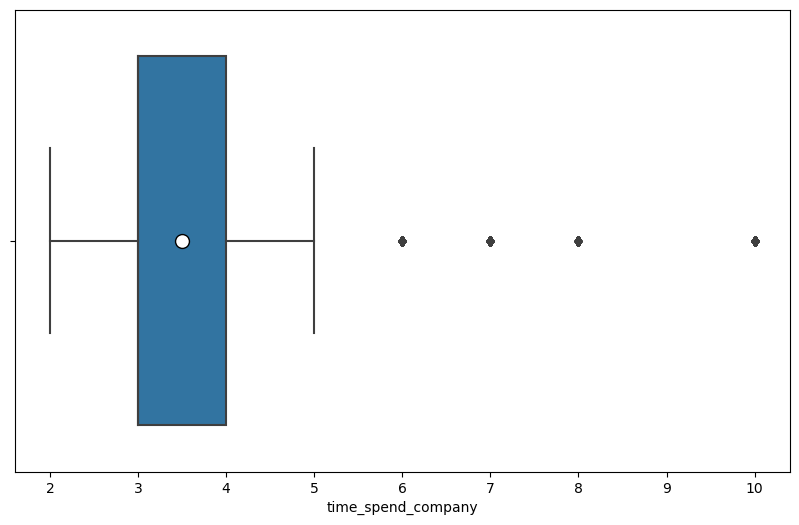

In [44]:
sns.boxplot(data=df, 
            x="time_spend_company",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

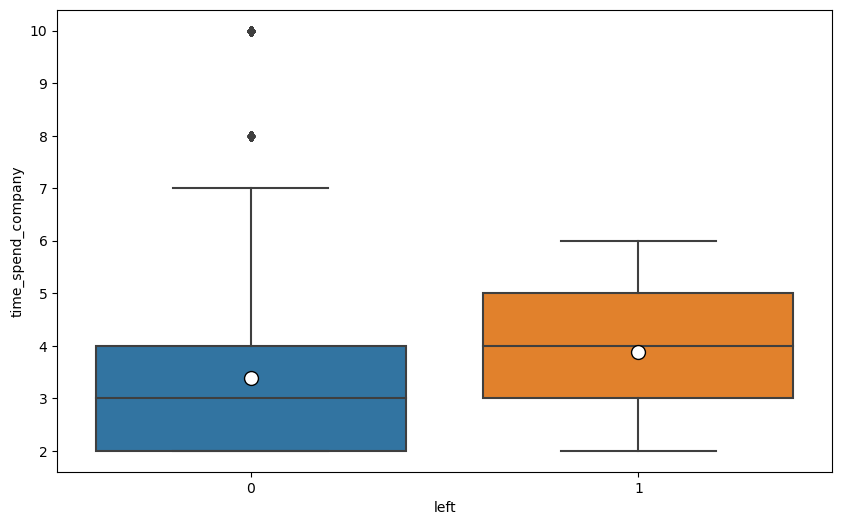

In [45]:
sns.boxplot(data=df, 
            y="time_spend_company", 
            x="left",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

**Work_accident**

In [46]:
df.Work_accident.value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

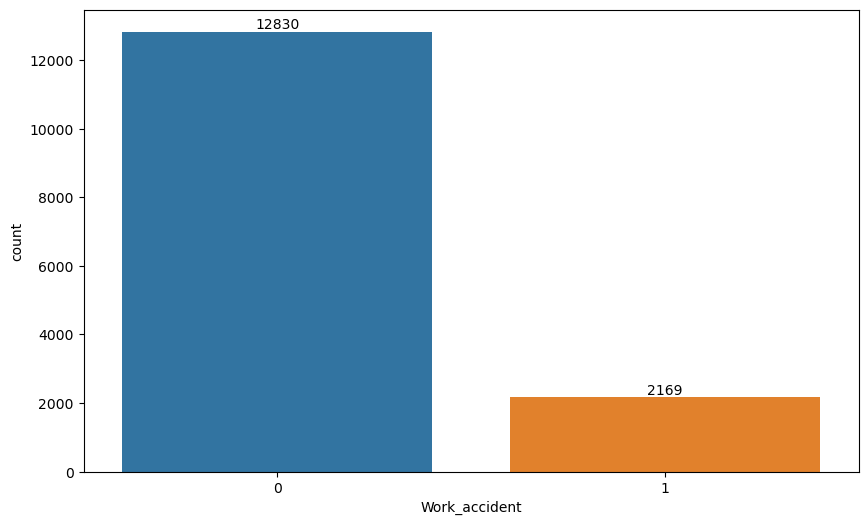

In [47]:
ax=sns.countplot(x=df.Work_accident)
ax.bar_label(ax.containers[0]);

In [48]:
df.groupby("left")["Work_accident"].value_counts()

left  Work_accident
0     0                9428
      1                2000
1     0                3402
      1                 169
Name: Work_accident, dtype: int64

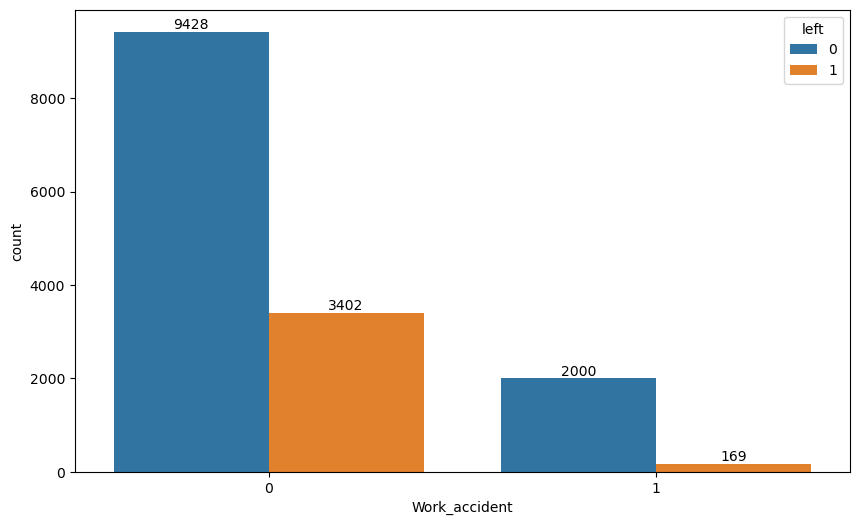

In [49]:
ax=sns.countplot(x=df["Work_accident"], hue=df.left)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

**promotion_last_5years**

In [50]:
df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

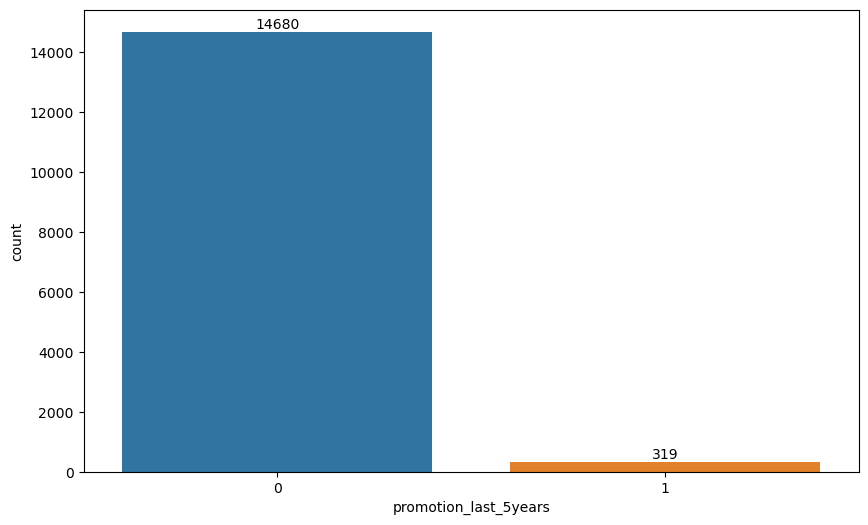

In [51]:
ax=sns.countplot(x=df.promotion_last_5years)
ax.bar_label(ax.containers[0]);

In [52]:
df.groupby("left")["promotion_last_5years"].value_counts()

left  promotion_last_5years
0     0                        11128
      1                          300
1     0                         3552
      1                           19
Name: promotion_last_5years, dtype: int64

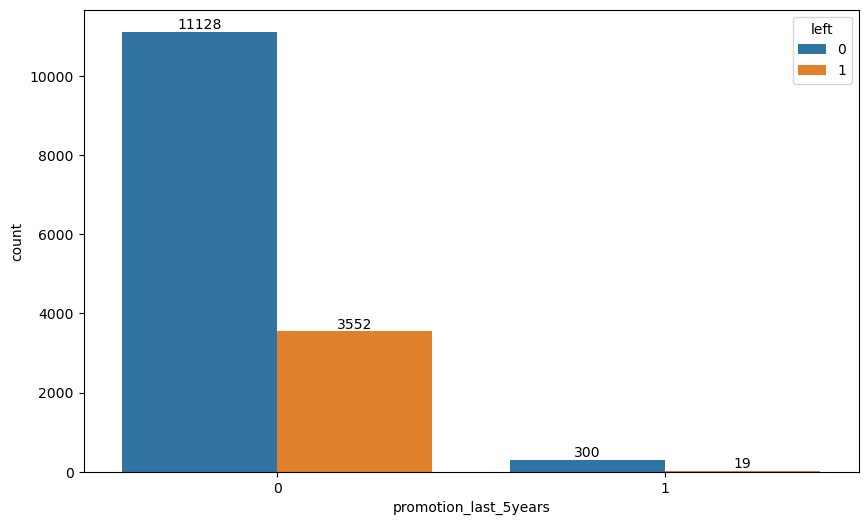

In [53]:
ax=sns.countplot(x=df["promotion_last_5years"], hue=df.left)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

**Departments**

In [54]:
df = df.rename(columns={'Departments ':'departments'})

In [55]:
df["departments"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: departments, dtype: int64

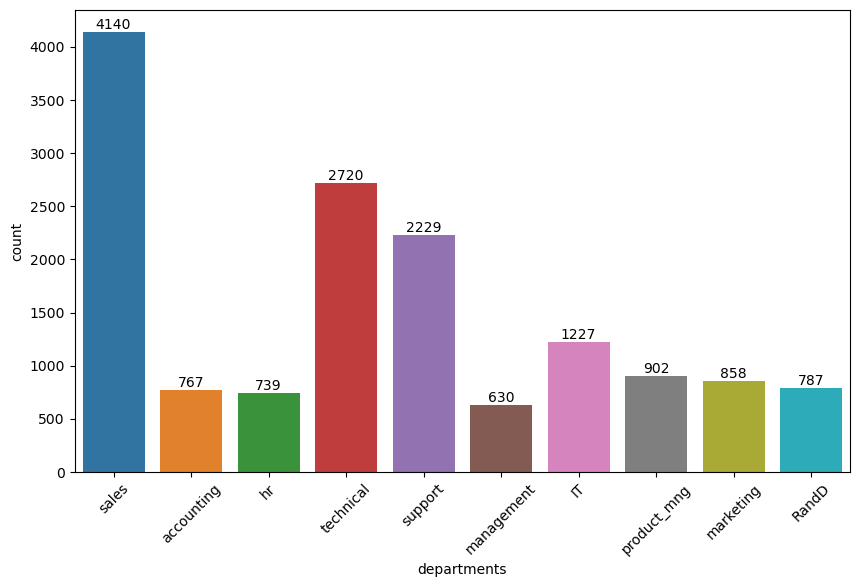

In [56]:
ax=sns.countplot(x=df["departments"])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45);

In [57]:
df.groupby("left")["departments"].value_counts()

left  departments
0     sales          3126
      technical      2023
      support        1674
      IT              954
      product_mng     704
      RandD           666
      marketing       655
      accounting      563
      management      539
      hr              524
1     sales          1014
      technical       697
      support         555
      IT              273
      hr              215
      accounting      204
      marketing       203
      product_mng     198
      RandD           121
      management       91
Name: departments, dtype: int64

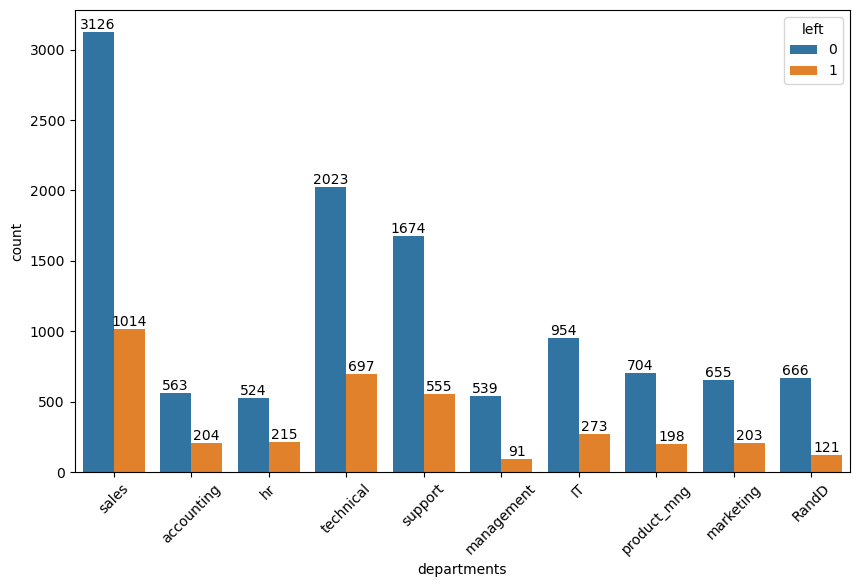

In [58]:
ax=sns.countplot(x=df["departments"], hue=df.left)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45);

**salary**

In [59]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

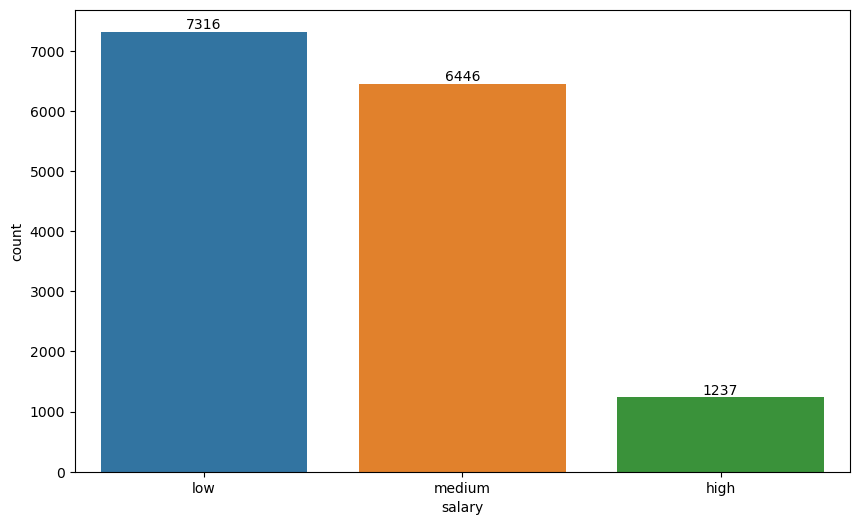

In [60]:
ax=sns.countplot(x=df.salary)
ax.bar_label(ax.containers[0]);

In [61]:
df.groupby("left")["salary"].value_counts()

left  salary
0     low       5144
      medium    5129
      high      1155
1     low       2172
      medium    1317
      high        82
Name: salary, dtype: int64

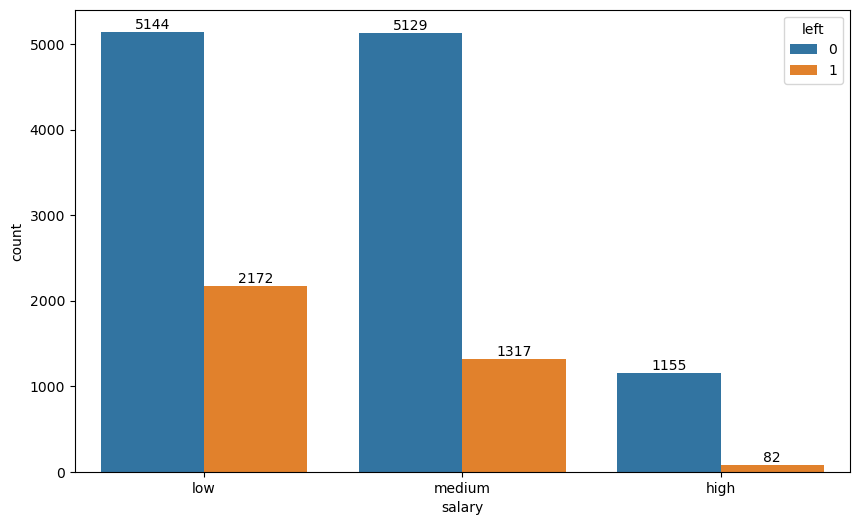

In [62]:
ax=sns.countplot(x=df["salary"], hue=df.left)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

In [63]:
sal= df.groupby(["salary"]).left.value_counts(normalize=True)
sal

salary  left
high    0       0.933711
        1       0.066289
low     0       0.703116
        1       0.296884
medium  0       0.795687
        1       0.204313
Name: left, dtype: float64

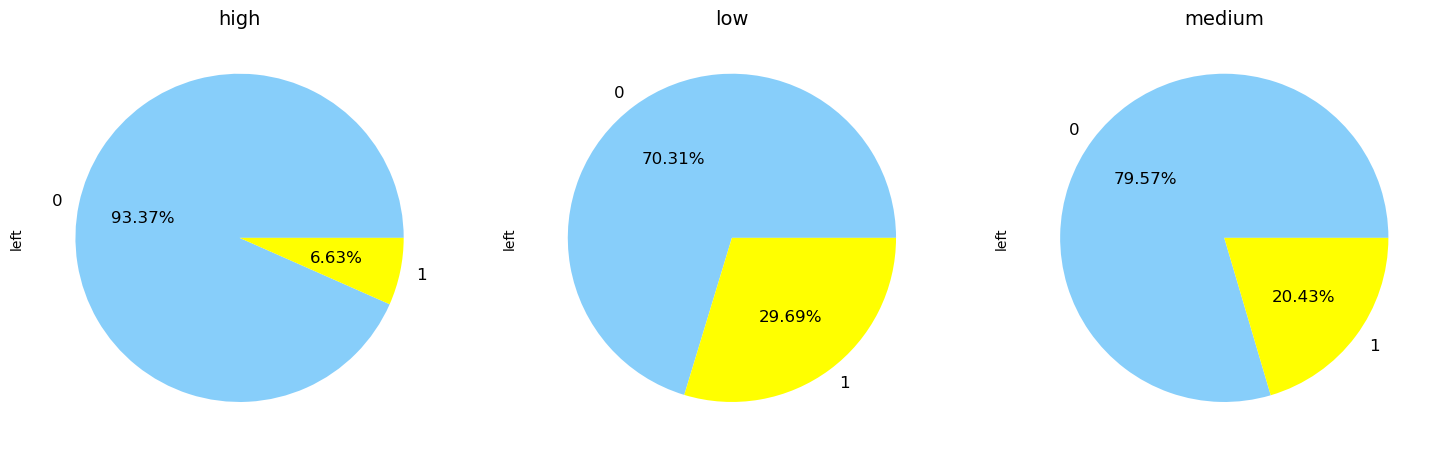

In [64]:
plt.figure(figsize = (18, 6))
index = 1
for i in [0, 2, 4]:
    plt.subplot(1,3,index)
    sal[i:i+2].plot.pie(subplots=True,
                        labels=[0, 1],
                        autopct="%.2f%%",
                        textprops={'fontsize': 12},
                        colors=['lightskyblue', 'yellow'],
                        )
    plt.title(sal.index[i][0], fontdict = {'fontsize': 14})
#    plt.legend()
    index += 1

**Correlation between features**

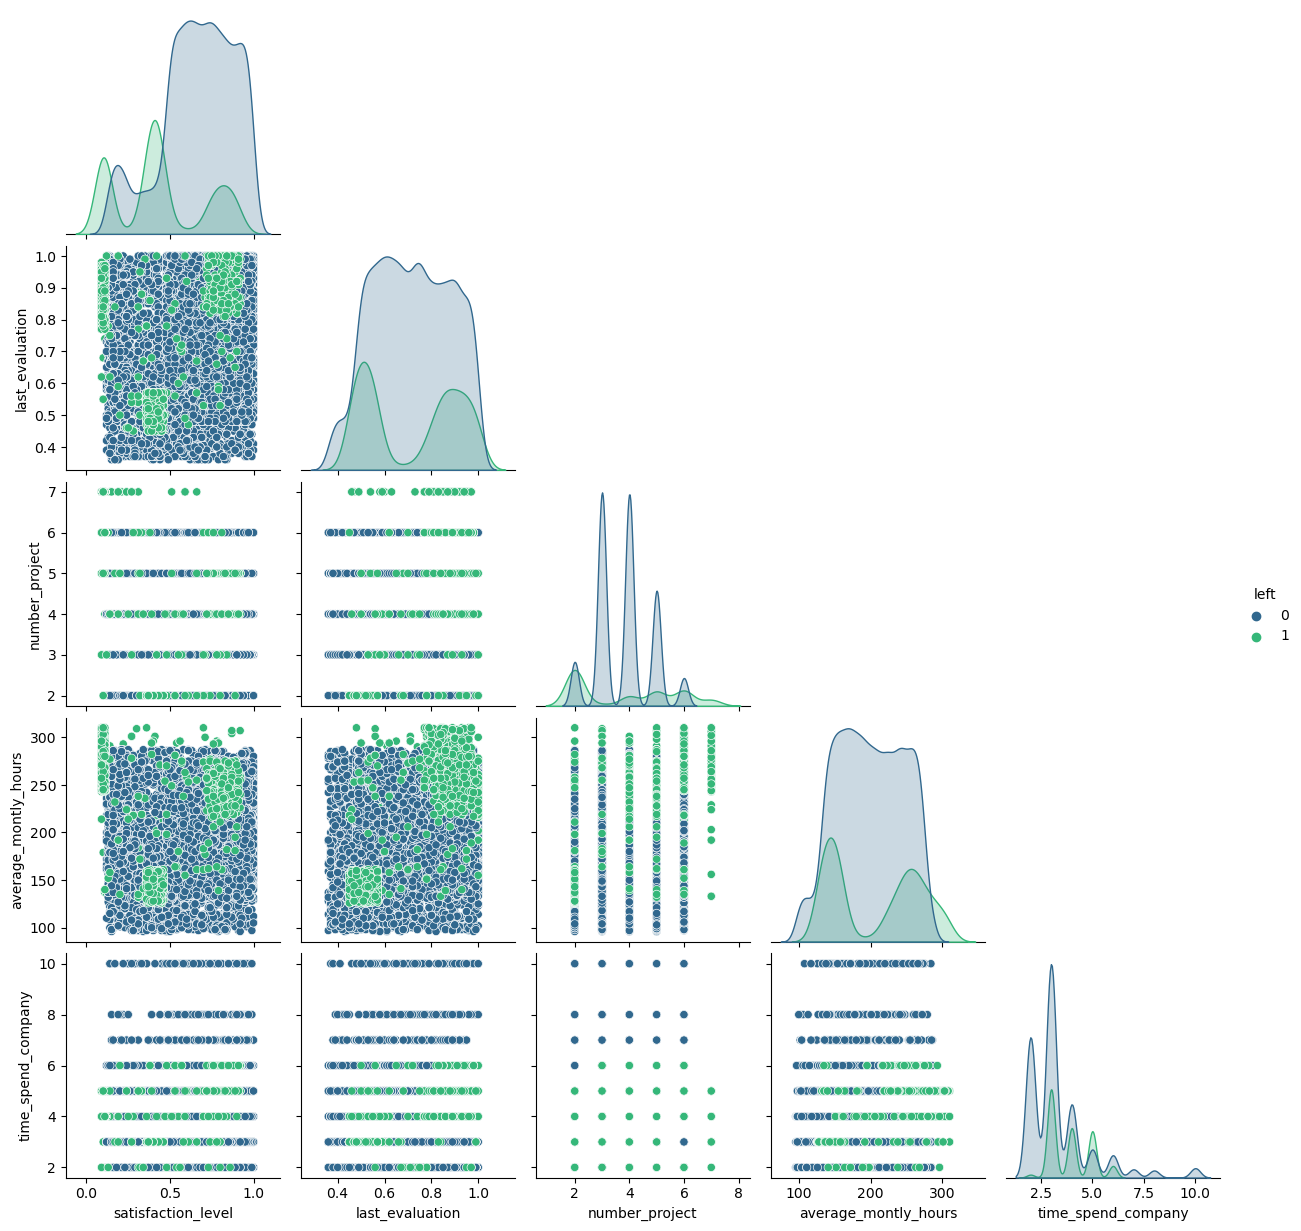

In [65]:
sns.pairplot(df.drop(columns=["Work_accident",'promotion_last_5years']),hue="left", palette="viridis", corner=True);

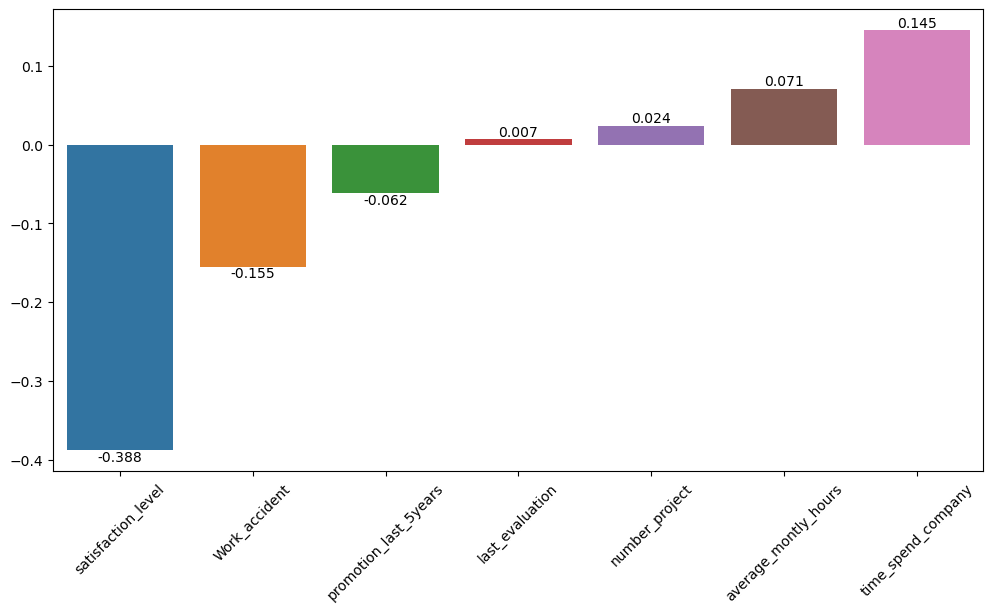

In [66]:
df_corr=df.corr()["left"].drop("left").sort_values()
plt.figure(figsize = (12,6),dpi = 100)
ax=sns.barplot(x=df_corr.index, y=df_corr.values.round(3))
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45);

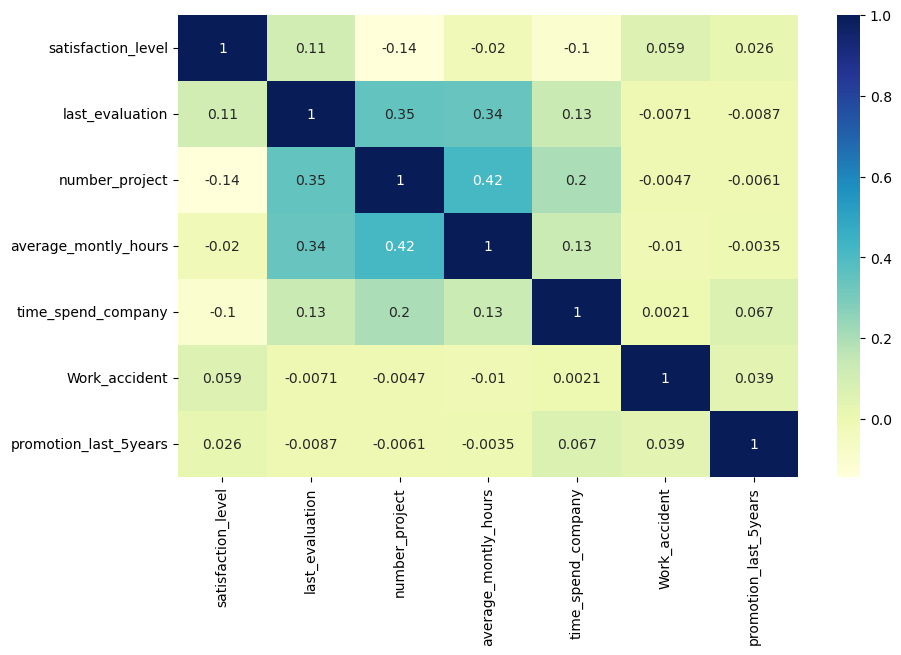

In [67]:
sns.heatmap(df.drop("left",axis=1).corr(),annot=True, cmap="YlGnBu");

#  Data Pre-Processing

In [68]:
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve,roc_auc_score,f1_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [69]:
X=df.drop("left", axis=1)
y=df.left

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [71]:
print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_test shap : {X_test.shape}")
print(f"y_test : {y_test.shape}")

X_train shape : (11999, 9)
y_train shape : (11999,)
X_test shap : (3000, 9)
y_test : (3000,)


In [72]:
cat = X_train.select_dtypes("object").columns
cat

Index(['departments', 'salary'], dtype='object')

In [73]:
OneHot_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
column_trans = make_column_transformer((OneHot_enc,cat), 
                                       remainder=MinMaxScaler())

In [74]:
X_train=column_trans.fit_transform(X_train)
X_test=column_trans.transform(X_test)

In [75]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

# Model Building

## Logistic Regression 

In [76]:
def sigmoid(h):
    return 1/(1+np.exp(-h))

def cross_entropy(y,p_hat):
    return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

In [77]:
#metrics

def accuracy(y,y_hat):
    return np.mean(y==y_hat)

def recall(y, y_hat, c):
    return np.mean(y_hat[y==c]==c)

def precision(y,y_hat,c):
    return np.mean(y[y_hat==c]==c)

def F1(y,y_hat,c):
    return (2*precision(y,y_hat,c)*recall(y,y_hat,c))/(precision(y,y_hat,c)+recall(y,y_hat,c))

In [78]:
class SLogisticRegression():

    def __init__(self,thresh=0.5):
        self.thresh=thresh
        self.w=None
        self.b = None

    def fit(self, X,y, eta =1e-3, epochs=1e3, show_curve=False):
        epochs =int(epochs)
        N,D=X.shape

        # Initialize weights
        self.w =np.random.randn(D)
        self.b =np.random.randn(1)

        J =np.zeros(epochs)

        for epoch in range(epochs):
          p_hat = self.__forward__(X)
          J[epoch] = cross_entropy(y,p_hat)
          #update weights
          self.w -= eta*(1/N)*X.T@(p_hat-y)
          self.b -= eta*(1/N)*np.sum(p_hat-y)

        if show_curve:
          plt.figure()
          plt.plot(J)
          plt.xlabel("epochs")
          plt.ylabel("$\mathcal{J}$")
          plt.title("Training Curve")

    def __forward__(self, X):
        return sigmoid(X@self.w +self.b)

    def predict(self, X):
        return (self.__forward__(X)>= self.thresh).astype(np.int32)

In [79]:
#log_reg = SLogisticRegression()

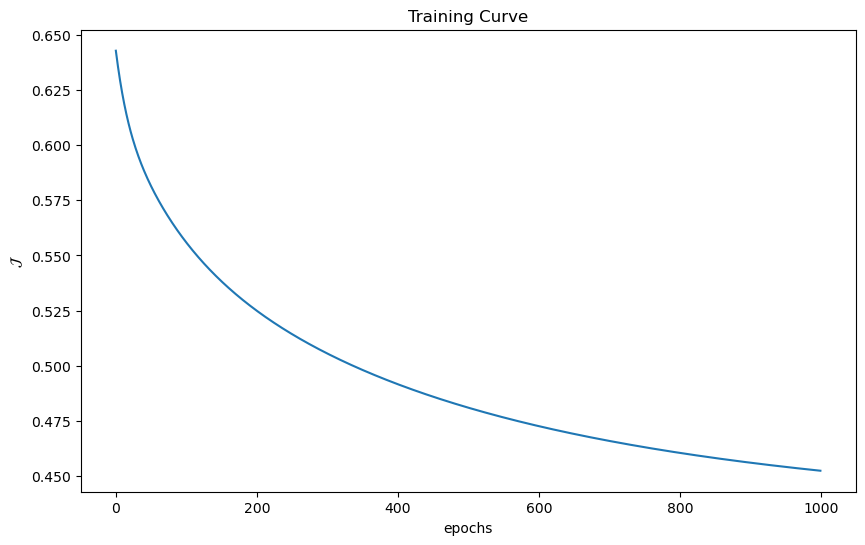

In [80]:
#log_reg.fit(X_train, y_train, eta = 1e-1, show_curve = True)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
log_reg= LogisticRegression()

In [83]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [84]:
y_train_hat = log_reg.predict(X_train)
y_test_hat = log_reg.predict(X_test)

In [85]:
accuracy(y_train,y_train_hat)

0.7890657554796233

In [86]:
recall(y_train,y_train_hat,1)

0.33986699334966747

In [87]:
precision(y_train,y_train_hat,1)

0.6008663366336634

In [88]:
F1(y_train,y_train_hat,1)

0.4341605186675609

In [89]:
log_ac=accuracy(y_test,y_test_hat)
log_ac

0.7933333333333333

In [90]:
log_recall=recall(y_test,y_test_hat,1)
log_recall

0.3487394957983193

In [91]:
log_precision=precision(y_test,y_test_hat,1)
log_precision

0.6163366336633663

In [92]:
log_f1=F1(y_test,y_test_hat,1)
log_f1

0.44543828264758495

In [93]:
print("\033[1m---------------------TRAIN REPORT---------------------\033[0m")
print(classification_report(y_train, y_train_hat))

print("\033[1m---------------------TEST REPORT---------------------\033[0m")
print(classification_report(y_test, y_test_hat))

---------------------TRAIN REPORT---------------------
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      9142
           1       0.60      0.34      0.43      2857

    accuracy                           0.79     11999
   macro avg       0.71      0.63      0.65     11999
weighted avg       0.77      0.79      0.77     11999

---------------------TEST REPORT---------------------
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2286
           1       0.62      0.35      0.45       714

    accuracy                           0.79      3000
   macro avg       0.72      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



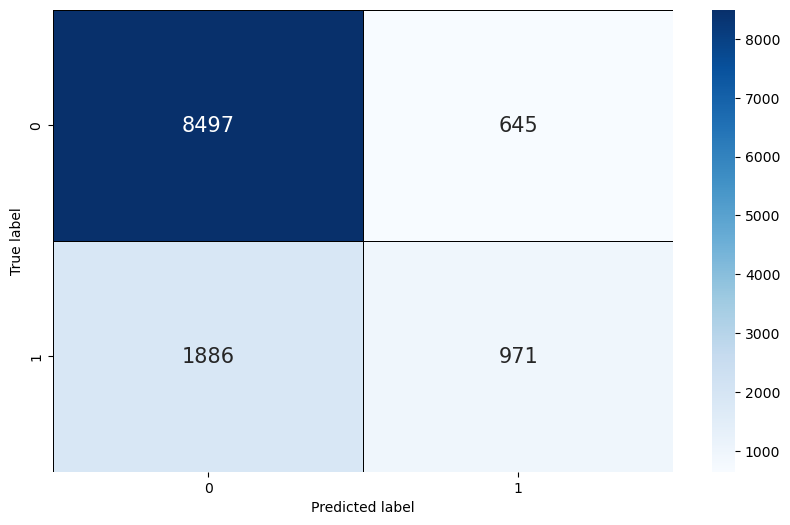

In [94]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_train, name='Actual')
y_pred = pd.Series(y_train_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

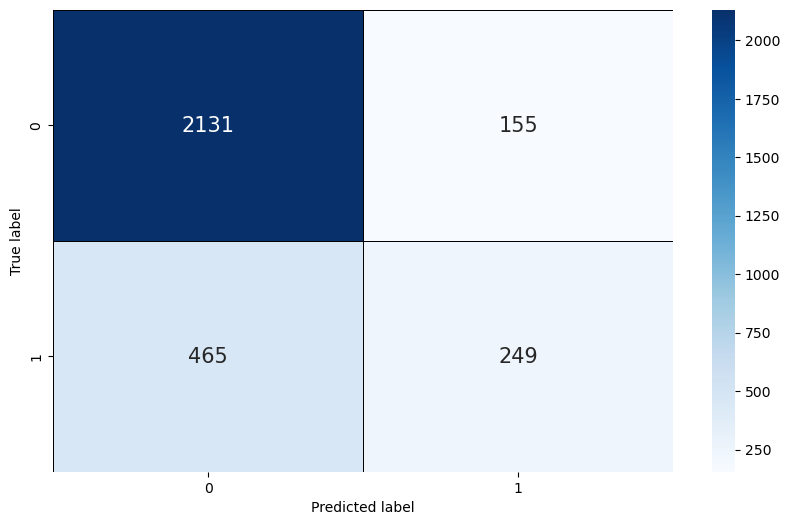

In [95]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

## KNN

In [96]:
from scipy.stats import multivariate_normal as mvn

In [97]:
class KNN():
    
    def fit(self, X,y):
        self.X=X
        self.y=y
    
    def predict(self,X,K):
        epsilon=1e-3
        N=len(X)
        y_hat=np.zeros(N)
        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2, axis=1)
            idxt=np.argsort(dist2)[:K]
            gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))
            y_hat[i]=np.bincount(self.y[idxt], weights=gamma_k).argmax()
        
        return y_hat

In [98]:
#for n in range(2,21):
    #knn=KNN()
    #knn.fit(X_train,y_train)
    #y_train_hat=knn.predict(X_train,n)
    #y_test_hat=knn.predict(X_test,n)
    #train_ac=accuracy(y_train, y_train_hat)
    #test_ac=accuracy(y_test, y_test_hat)
        
    #print(f'{n} : {train_ac}, {test_ac}')

In [99]:
knn=KNN()

In [100]:
knn.fit(X_train,y_train)

In [101]:
y_train_hat=knn.predict(X_train,3)

In [102]:
y_test_hat=knn.predict(X_test,3)

In [103]:
accuracy(y_train,y_train_hat)

0.9992499374947912

In [104]:
recall(y_train,y_train_hat,1)

0.999649982499125

In [105]:
precision(y_train,y_train_hat,1)

0.9972067039106145

In [106]:
F1(y_train,y_train_hat,1)

0.9984268484530676

In [107]:
knn_ac=accuracy(y_test,y_test_hat)
knn_ac

0.959

In [108]:
knn_recall=recall(y_test,y_test_hat,1)
knn_recall

0.9551820728291317

In [109]:
knn_precision=precision(y_test,y_test_hat,1)
knn_precision

0.8822768434670116

In [110]:
knn_f1=F1(y_test,y_test_hat,1)
knn_f1

0.9172831203765973

In [111]:
print("\033[1m---------------------TRAIN REPORT---------------------\033[0m")
print(classification_report(y_train, y_train_hat))

print("\033[1m---------------------TEST REPORT---------------------\033[0m")
print(classification_report(y_test, y_test_hat))

---------------------TRAIN REPORT---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      2857

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999

---------------------TEST REPORT---------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2286
           1       0.88      0.96      0.92       714

    accuracy                           0.96      3000
   macro avg       0.93      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



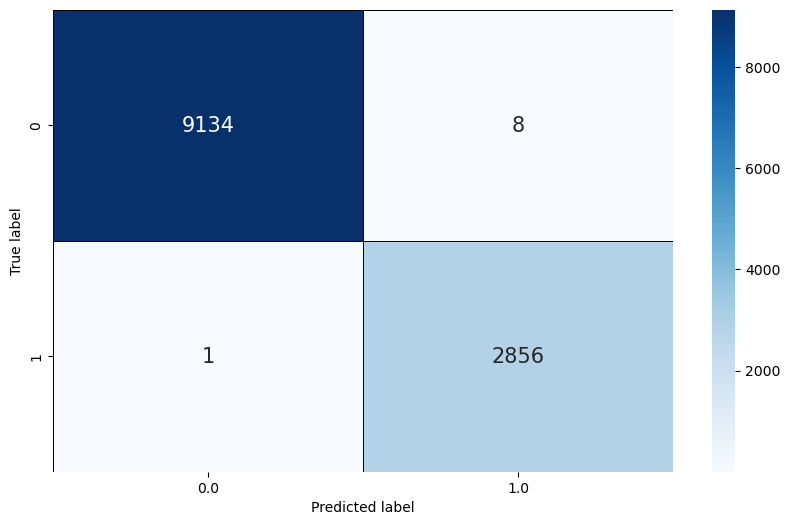

In [112]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_train, name='Actual')
y_pred = pd.Series(y_train_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

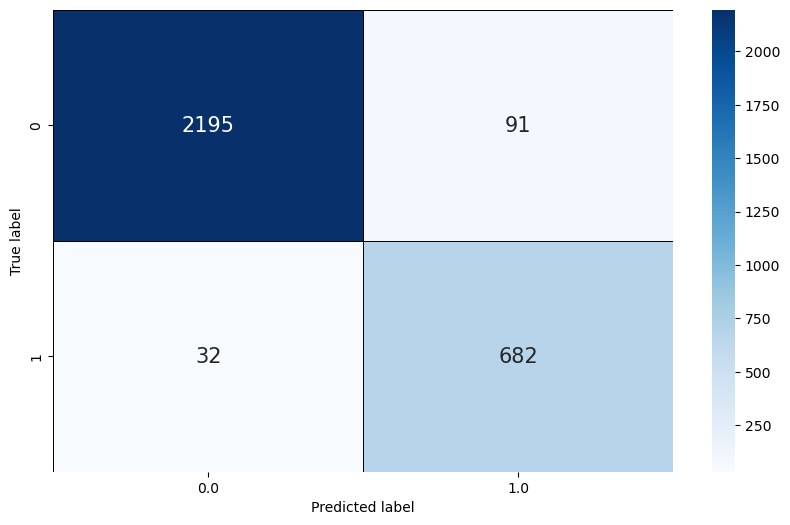

In [113]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

## ANN

In [114]:
def Linear(H):
    return H

In [115]:
def ReLU(H):
    return H*(H>0) 

In [116]:
def sigmoid(H):
    return 1/(1+np.exp(-H))

In [117]:
def softmax(H):
    eH=np.exp(H)
    return eH/eH.sum(axis=1, keepdims=True)

In [118]:
def one_hot_encode(y):
    N=len(y)
    K=len(set(y))
    Y=np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]]=1
    
    return Y

In [119]:
class ShallowANN():

  def fit(self, X, y, neurons=60, eta =1e-3, epochs=1e3, show_curve=False):
    epochs=int(epochs)
    Y = one_hot_encode(y)
    N,D= X.shape
    K = Y.shape[1]

    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip([D,neurons],[neurons,K]),1)}

    self.B = {l: np.random.randn(M) for l, M in enumerate([neurons, K],1)}

    self.a = {1:np.tanh, 2:softmax}

    J= np.zeros(epochs)

    # Gradient Descent
    for epoch in range(epochs):
      self.__forward__(X)
      J[epoch]=cross_entropy(Y,self.Z[2])

      self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
      self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)

      self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
      self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

    
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$") 
      plt.title("Training Curve")
      plt.show()

  def __forward__(self, X):
    self.Z={0:X}

    for l in sorted(self.W.keys()):
      self.Z[l]= self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

  def predict(self, X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

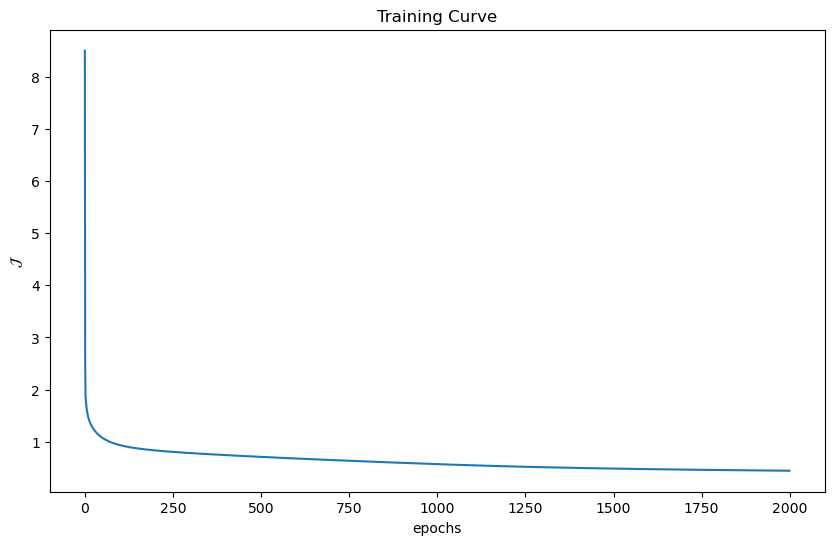

In [120]:
ann = ShallowANN()
ann.fit(X_train,y_train,neurons=20, eta = 2e-1, epochs=2e3, show_curve=True)
y_train_hat =ann.predict(X_train)

In [121]:
accuracy(y_train,y_train_hat)

0.9256604717059755

In [122]:
recall(y_train,y_train_hat,1)

0.8344417220861043

In [123]:
precision(y_train,y_train_hat,1)

0.850517302889761

In [124]:
F1(y_train,y_train_hat,1)

0.8424028268551237

In [125]:
y_test_hat =ann.predict(X_test)

In [126]:
ann_ac=accuracy(y_test,y_test_hat)
ann_ac

0.928

In [127]:
ann_recall=recall(y_test,y_test_hat,1)

In [128]:
ann_precision=precision(y_test,y_test_hat,1)

In [129]:
ann_f1=F1(y_test,y_test_hat,1)

In [130]:
print("\033[1m---------------------TRAIN REPORT---------------------\033[0m")
print(classification_report(y_train, y_train_hat))

print("\033[1m---------------------TEST REPORT---------------------\033[0m")
print(classification_report(y_test, y_test_hat))

---------------------TRAIN REPORT---------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9142
           1       0.85      0.83      0.84      2857

    accuracy                           0.93     11999
   macro avg       0.90      0.89      0.90     11999
weighted avg       0.93      0.93      0.93     11999

---------------------TEST REPORT---------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2286
           1       0.86      0.83      0.85       714

    accuracy                           0.93      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.93      0.93      0.93      3000



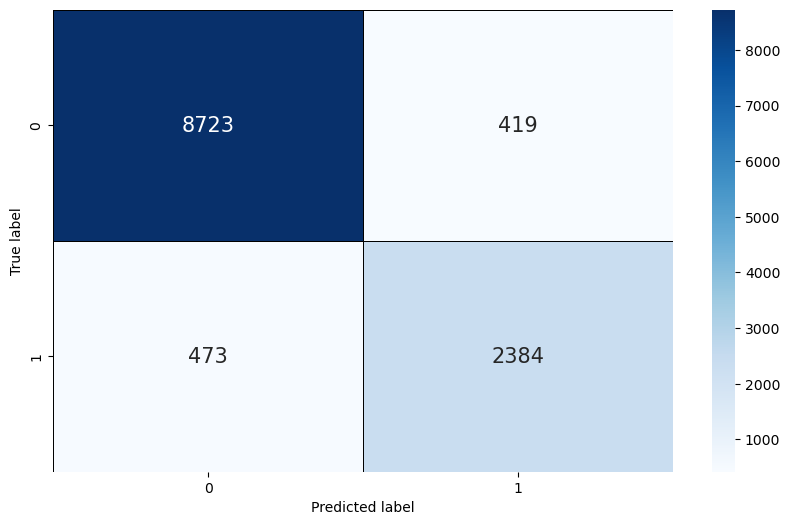

In [131]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_train, name='Actual')
y_pred = pd.Series(y_train_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

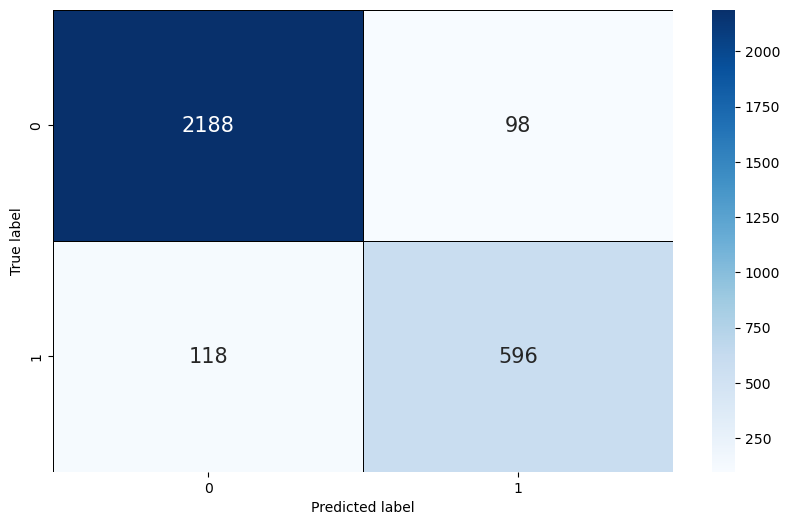

In [132]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [133]:
def cross_entropy(Y,P_hat):
    return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y,Y_hat):
    return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

In [134]:
def derivative(Z,a):
    if a==Linear:
        return 1
    
    elif a==sigmoid:
        
        return Z*(1-Z)
    
    elif a==np.tanh:
        
        return 1-Z*Z
    
    elif a==ReLU:
        return (Z>0).astype(int)
    
    else:
        ValueError("Unknown Activation Function")
    

In [135]:
class ANN():
  def __init__(self, architecture, activations=None, mode=0):
    self.mode=mode
    self.architecture=architecture
    self.activations=activations
    self.L = len(architecture)+1

  def fit(self, X, y, eta=1e-3, epochs =1e3, show_curve=False):
    epochs=int(epochs)
    if self.mode:
      Y=y
    else:
      Y =one_hot_encode(y)

    N,D =X.shape
    K=Y.shape[1]

    #Initialize Weights and Biases:  Stochastic Initialization
    self.W ={l: np.random.randn(M[0],M[1]) for l, M in enumerate
             (zip(([D]+self.architecture), (self.architecture +[K])),1)}
    self.b = {l: np.random.randn(M) for l,M in enumerate(self.architecture +[K],1)}

    #Activation Function Loading
    if self.activations is None:
      self.a = {l: ReLU for l in range(1, self.L)}
    else:
      self.a = {l: act for l, act in enumerate(self.activations, 1)} 

    # Mode Output Activation Function Set
    if self.mode:
      self.a[self.L]= linear
    else:
      self.a[self.L] = softmax

    J = np.zeros(epochs)

    #Gradient Descent/ Back Prop

    for epoch in range(epochs):
      self.forward(X)
      if self.mode:
        J[epoch]= OLS(Y, self.Z[self.L])
      else:
        J[epoch]= cross_entropy(Y, self.Z[self.L])

      dH = (1/N)*(self.Z[self.L]-Y)

      for l in sorted(self.W.keys(), reverse= True):
        dW = self.Z[l-1].T@dH
        db = dH.sum(axis=0)

        self.W[l] -= eta*dW
        self.b[l] -= eta*db

        if l>1:
          dZ = dH@self.W[l].T 
          dH = dZ*derivative(self.Z[l-1], self.a[l-1]) 
    
    if show_curve:
        plt.figure()
        plt.plot(J)
        plt.xlabel("epochs")
        plt.ylabel("$\mathcal{J}$")
        plt.show()

  def forward(self, X):
    self.Z ={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+ self.b[l]) 

  def predict ( self, X):
    self.forward(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)

In [136]:
multi_ann=ANN([60, 30, 20], [np.tanh, np.tanh, np.tanh])

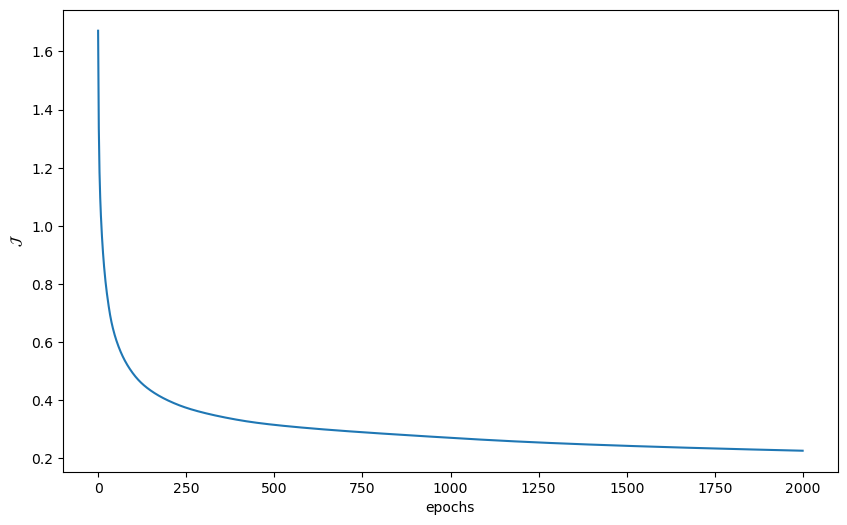

In [137]:
multi_ann.fit(X_train, y_train, eta = 3e-2, epochs = 2e3, show_curve = True)
y_train_hat = multi_ann.predict(X_train)

In [138]:
accuracy(y_train,y_train_hat)

0.9267438953246104

In [139]:
recall(y_train,y_train_hat,1)

0.8011900595029752

In [140]:
precision(y_train,y_train_hat,1)

0.8803846153846154

In [141]:
F1(y_train,y_train_hat,1)

0.8389224848818032

In [142]:
y_test_hat =ann.predict(X_test)

In [143]:
accuracy(y_test,y_test_hat)


0.928

In [144]:
recall(y_test,y_test_hat,1)

0.834733893557423

In [145]:
precision(y_test,y_test_hat,1)

0.8587896253602305

In [146]:
F1(y_test,y_test_hat,1)

0.846590909090909

In [147]:
print("\033[1m---------------------TRAIN REPORT---------------------\033[0m")
print(classification_report(y_train, y_train_hat))

print("\033[1m---------------------TEST REPORT---------------------\033[0m")
print(classification_report(y_test, y_test_hat))

---------------------TRAIN REPORT---------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      9142
           1       0.88      0.80      0.84      2857

    accuracy                           0.93     11999
   macro avg       0.91      0.88      0.90     11999
weighted avg       0.93      0.93      0.93     11999

---------------------TEST REPORT---------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2286
           1       0.86      0.83      0.85       714

    accuracy                           0.93      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.93      0.93      0.93      3000



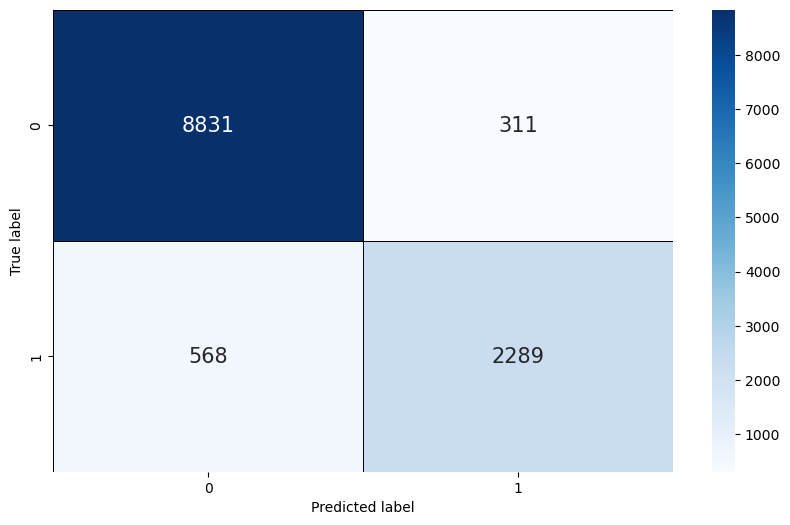

In [148]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_train, name='Actual')
y_pred = pd.Series(y_train_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

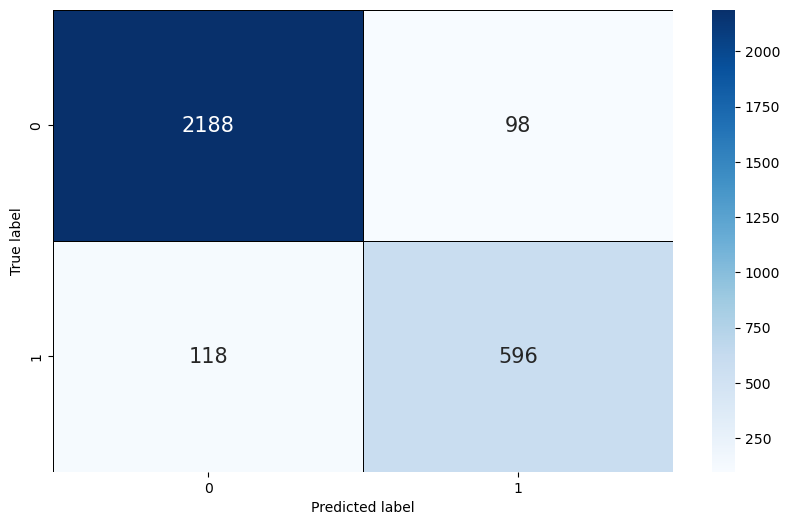

In [149]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

## Comparing Models 

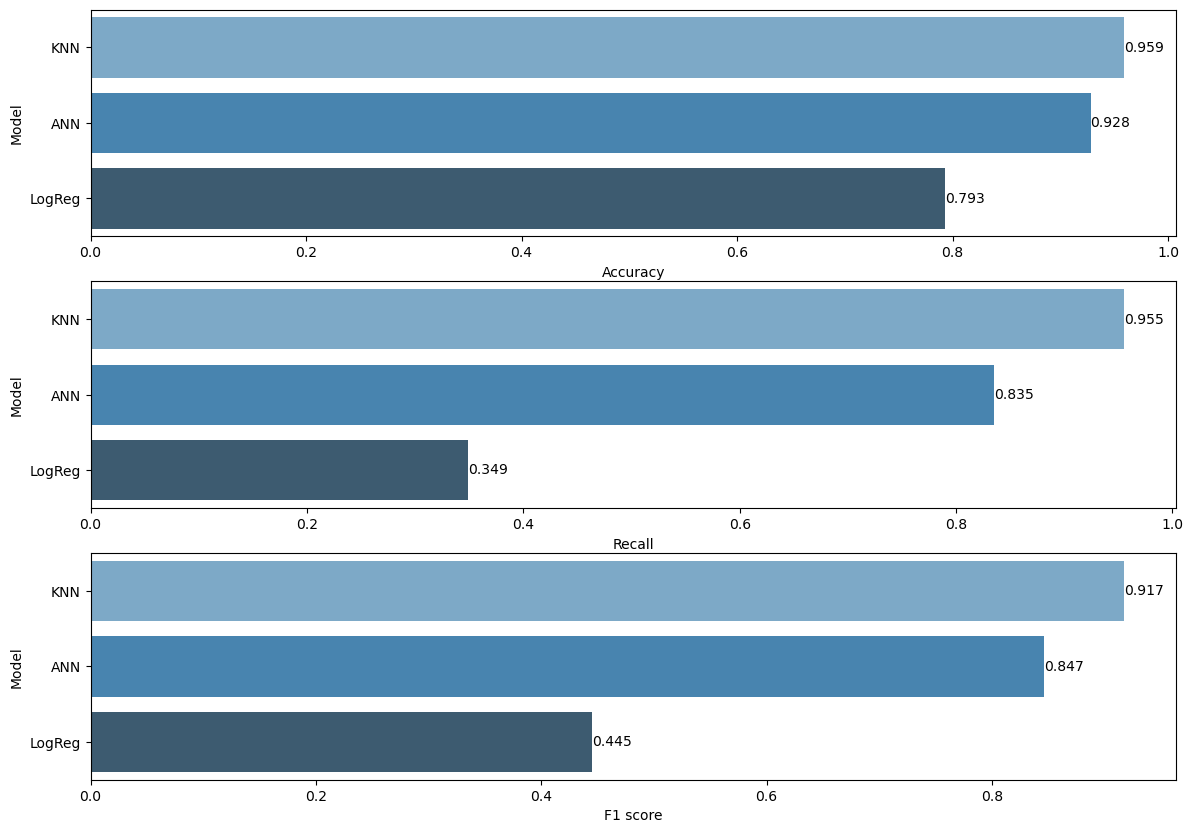

In [150]:
compare = pd.DataFrame({"Model": ["LogReg", "KNN", "ANN"],
                        "Accuracy": [log_ac,knn_ac,ann_ac],
                        "Recall": [log_recall,knn_recall,ann_recall],
                       "F1 score": [log_f1,knn_f1, ann_f1]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))

plt.subplot(311)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="F1 score", ascending=False)
ax=sns.barplot(x="F1 score", y="Model", data=compare, palette="Blues_d")
labels(ax)


# SMOTE

In [151]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.combine import SMOTEENN, SMOTETomek

In [152]:
over_smoteenn=SMOTEENN()
over_smotetomek=SMOTETomek()
over=SMOTE()

In [153]:
len(y_train[y_train==0])

9142

In [154]:
X_train_over, y_train_over = over_smoteenn.fit_resample(X_train, y_train)

In [219]:
y_1=len(y_train_over[y_train_over==1])
y_1

8858

In [220]:
y_0=len(y_train_over[y_train_over==0])
y_0

8223

In [221]:
dic={"left":y_1, "stay":y_0}

In [241]:
df_y=pd.DataFrame(y_train_over, columns=["left"])
df_y.value_counts()

left
1       8858
0       8223
dtype: int64

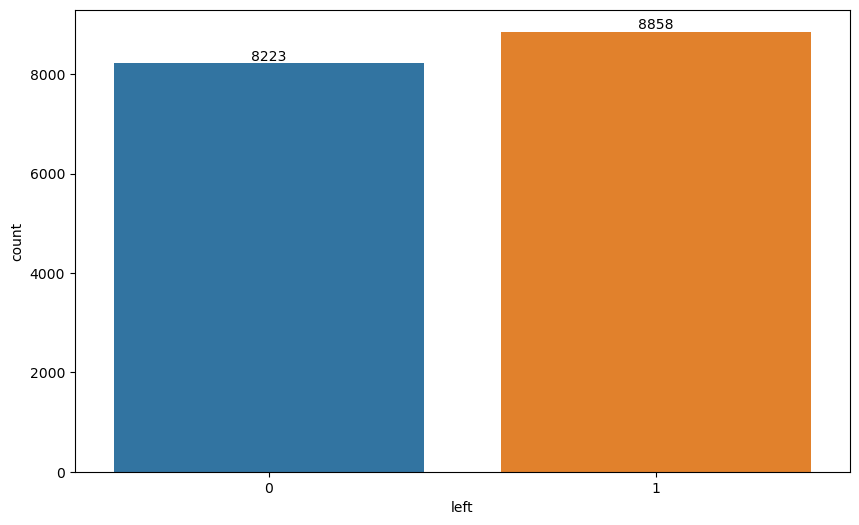

In [243]:
fig, ax = plt.subplots()

ax = sns.countplot(data=df_y, x="left")

for container in ax.containers:
    ax.bar_label(container);

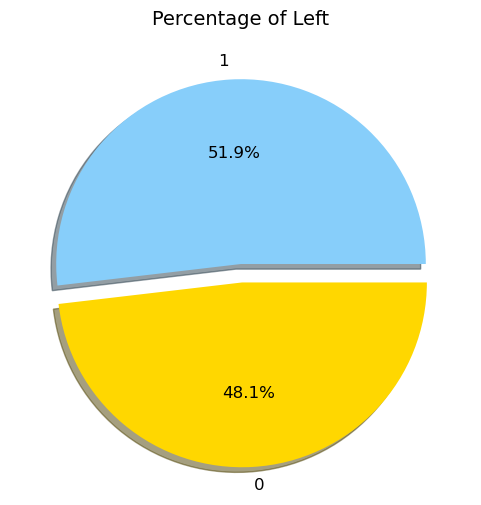

In [245]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(x=df_y.value_counts().values, 
       labels=[1,0], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
       )
plt.title("Percentage of Left", fontdict = {'fontsize': 14})
plt.show()

## Logistic Regression with SMOTE

In [157]:
#log_reg = SLogisticRegression()

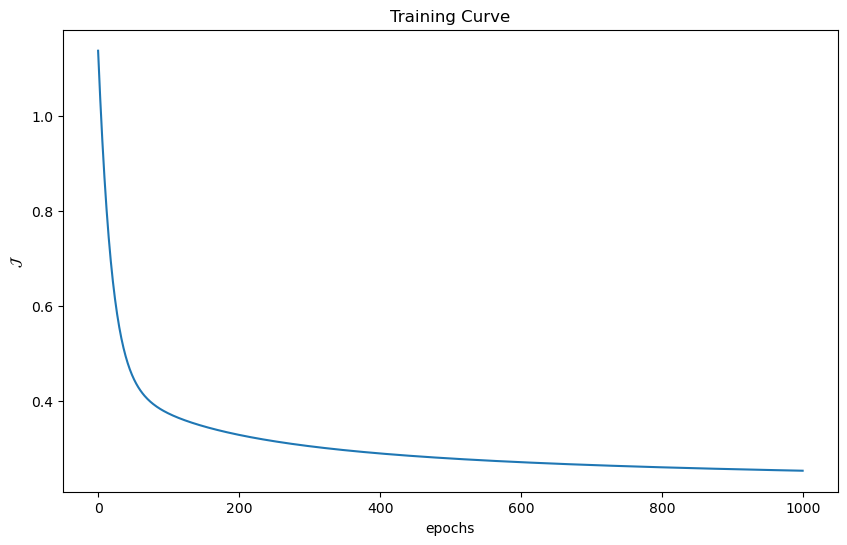

In [158]:
#log_reg.fit(X_train_over, y_train_over, eta = 1e-1, show_curve = True)

In [159]:
log_reg = LogisticRegression()

In [160]:
log_reg.fit(X_train_over,y_train_over)

LogisticRegression()

In [161]:
y_train_hat = log_reg.predict(X_train_over)

In [162]:
accuracy(y_train_over,y_train_hat)

0.7974357473215854

In [163]:
recall(y_train_over,y_train_hat,1)

0.8320162564913073

In [164]:
precision(y_train_over,y_train_hat,1)

0.7889102975808178

In [165]:
F1(y_train_over,y_train_hat,1)

0.8098901098901099

In [166]:
y_test_hat=log_reg.predict(X_test)

In [167]:
log_ac=accuracy(y_test,y_test_hat)
log_ac

0.7663333333333333

In [168]:
log_recall=recall(y_test,y_test_hat,1)
log_recall

0.8291316526610645

In [169]:
log_precision=precision(y_test,y_test_hat,1)
log_precision

0.5055508112724167

In [170]:
log_f1=F1(y_test,y_test_hat,1)
log_f1

0.6281167108753315

In [171]:
print("\033[1m---------------------TRAIN REPORT---------------------\033[0m")
print(classification_report(y_train_over, y_train_hat))
    
print("\033[1m---------------------TEST REPORT---------------------\033[0m")
print(classification_report(y_test, y_test_hat))


---------------------TRAIN REPORT---------------------
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      8223
           1       0.79      0.83      0.81      8858

    accuracy                           0.80     17081
   macro avg       0.80      0.80      0.80     17081
weighted avg       0.80      0.80      0.80     17081

---------------------TEST REPORT---------------------
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2286
           1       0.51      0.83      0.63       714

    accuracy                           0.77      3000
   macro avg       0.72      0.79      0.73      3000
weighted avg       0.83      0.77      0.78      3000



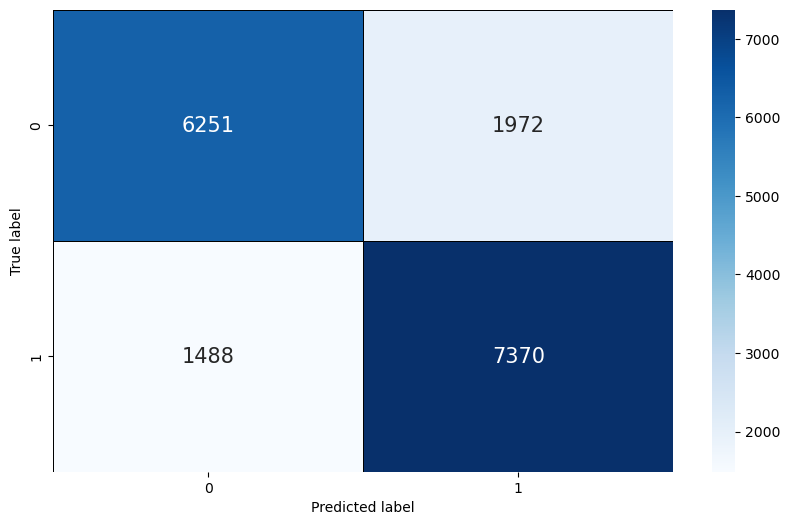

In [172]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_train_over, name='Actual')
y_pred = pd.Series(y_train_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

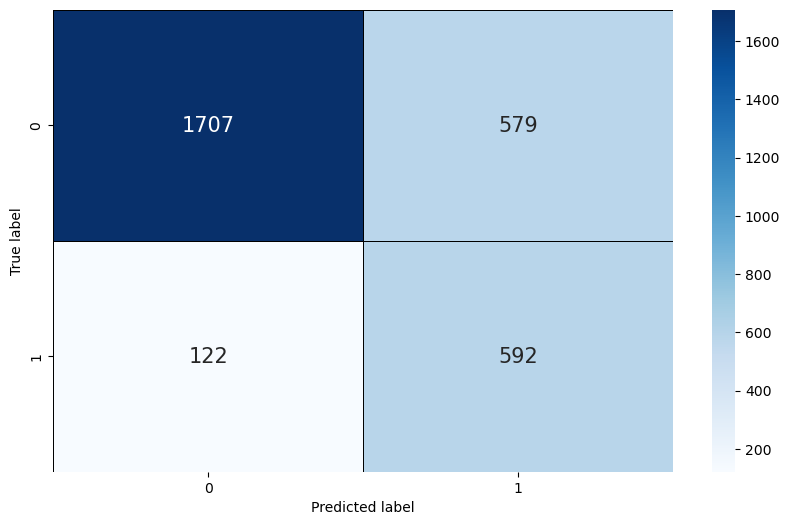

In [173]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

## KNN with SMOTE

In [174]:
knn=KNN()

In [175]:
knn.fit(X_train_over,y_train_over)

In [176]:
y_train_hat=knn.predict(X_train_over,3)
y_test_hat=knn.predict(X_test,3)

In [177]:
accuracy(y_train_over,y_train_hat)

1.0

In [178]:
recall(y_train_over,y_train_hat,1)

1.0

In [179]:
precision(y_train_over,y_train_hat,1)

1.0

In [180]:
F1(y_train_over,y_train_hat,1)

1.0

In [181]:
knn_ac=accuracy(y_test,y_test_hat)
knn_ac

0.9323333333333333

In [182]:
knn_recall=recall(y_test,y_test_hat,1)
knn_recall

0.9243697478991597

In [183]:
knn_precision=precision(y_test,y_test_hat,1)
knn_precision

0.8158220024721878

In [184]:
knn_f1=F1(y_test,y_test_hat,1)
knn_f1

0.8667104399212081

In [185]:
print("\033[1m---------------------TRAIN REPORT---------------------\033[0m")
print(classification_report(y_train_over, y_train_hat))
    
print("\033[1m---------------------TEST REPORT---------------------\033[0m")
print(classification_report(y_test, y_test_hat))

---------------------TRAIN REPORT---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8223
           1       1.00      1.00      1.00      8858

    accuracy                           1.00     17081
   macro avg       1.00      1.00      1.00     17081
weighted avg       1.00      1.00      1.00     17081

---------------------TEST REPORT---------------------
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2286
           1       0.82      0.92      0.87       714

    accuracy                           0.93      3000
   macro avg       0.90      0.93      0.91      3000
weighted avg       0.94      0.93      0.93      3000



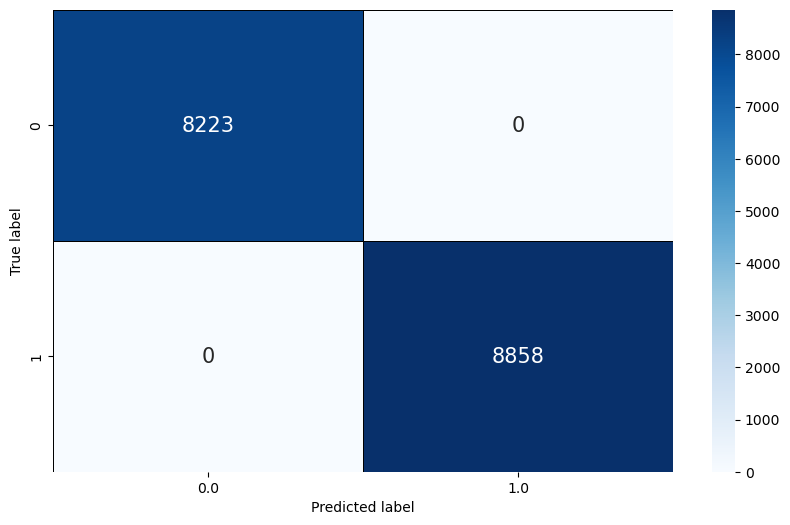

In [186]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_train_over, name='Actual')
y_pred = pd.Series(y_train_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

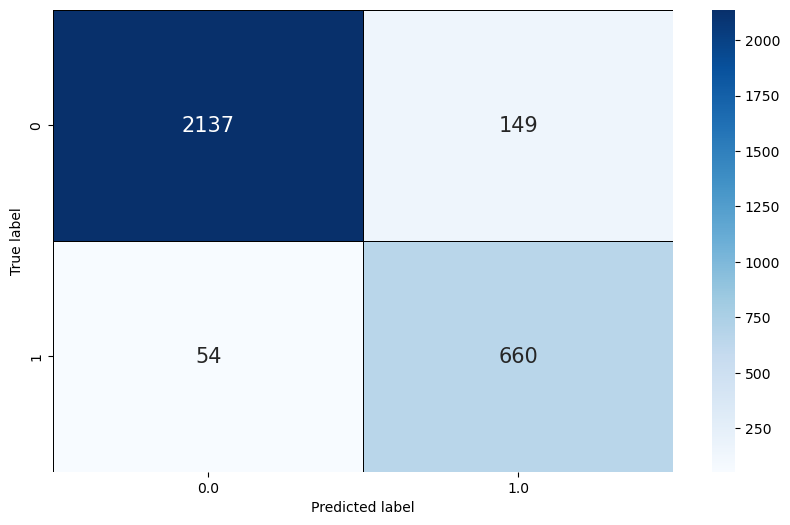

In [187]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

## ANN with SMOTE

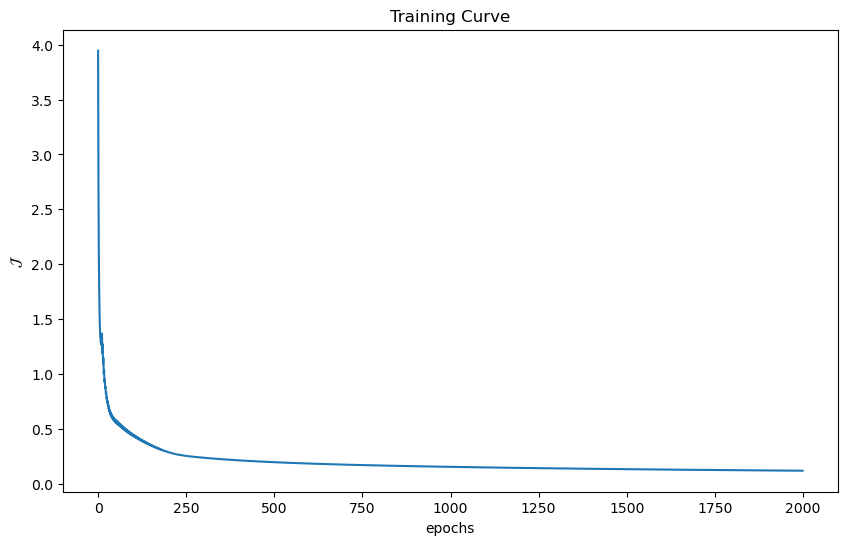

In [188]:
ann = ShallowANN()
ann.fit(X_train_over,y_train_over,neurons=80, eta = 2e-1, epochs=2e3, show_curve=True)
y_train_hat =ann.predict(X_train_over)

In [189]:
accuracy(y_train_over,y_train_hat)

0.9612434869152859

In [190]:
recall(y_train_over,y_train_hat,1)

0.960826371641454

In [191]:
precision(y_train_over,y_train_hat,1)

0.9643099932019035

In [192]:
F1(y_train_over,y_train_hat,1)

0.9625650305360778

In [193]:
y_test_hat =ann.predict(X_test)

In [194]:
ann_ac=accuracy(y_test,y_test_hat)
ann_ac

0.9206666666666666

In [195]:
ann_recall=recall(y_test,y_test_hat,1)
ann_recall

0.9229691876750701

In [196]:
ann_precision=precision(y_test,y_test_hat,1)
ann_precision

0.7826603325415677

In [197]:
ann_f1=F1(y_test,y_test_hat,1)
ann_f1

0.8470437017994858

In [198]:
print("\033[1m---------------------TRAIN REPORT---------------------\033[0m")
print(classification_report(y_train_over, y_train_hat))
    
print("\033[1m---------------------TEST REPORT---------------------\033[0m")
print(classification_report(y_test, y_test_hat))

---------------------TRAIN REPORT---------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8223
           1       0.96      0.96      0.96      8858

    accuracy                           0.96     17081
   macro avg       0.96      0.96      0.96     17081
weighted avg       0.96      0.96      0.96     17081

---------------------TEST REPORT---------------------
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2286
           1       0.78      0.92      0.85       714

    accuracy                           0.92      3000
   macro avg       0.88      0.92      0.90      3000
weighted avg       0.93      0.92      0.92      3000



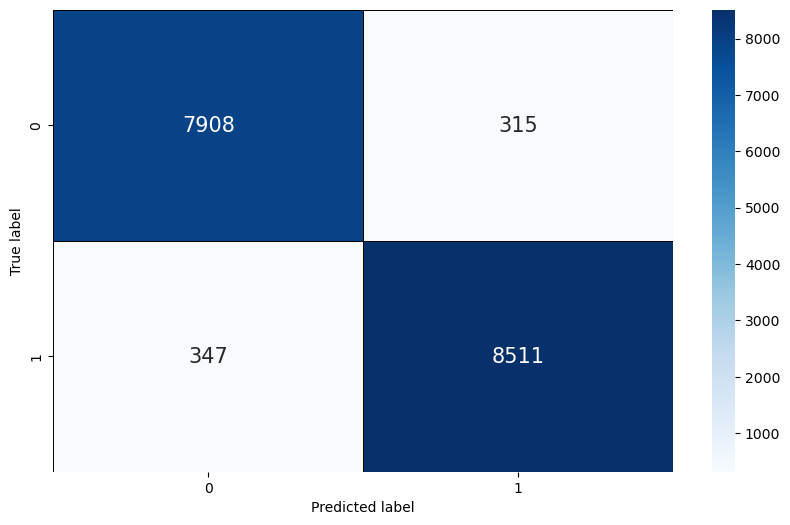

In [199]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_train_over, name='Actual')
y_pred = pd.Series(y_train_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

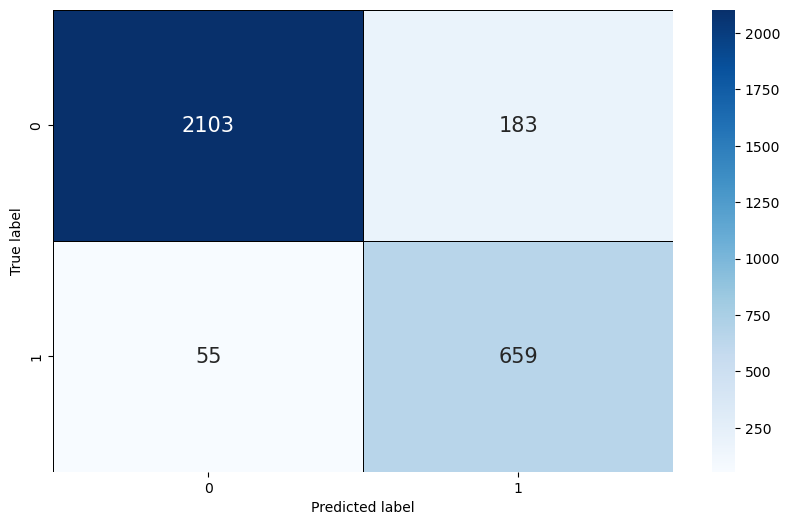

In [200]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [201]:
multi_ann=ANN([60, 30, 20], [np.tanh, np.tanh, np.tanh])

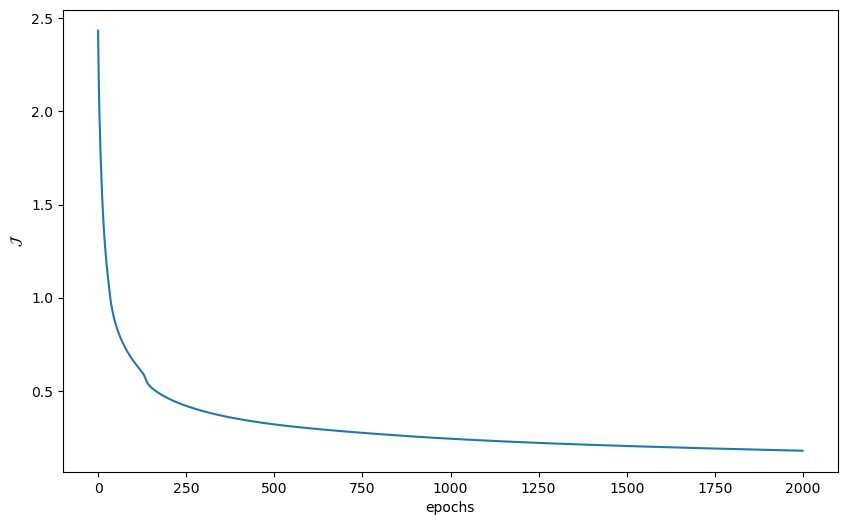

In [202]:
multi_ann.fit(X_train_over, y_train_over, eta = 3e-2, epochs = 2e3, show_curve = True)
y_train_hat = multi_ann.predict(X_train_over)

In [203]:
accuracy(y_train_over,y_train_hat)

0.9439728353140917

In [204]:
recall(y_train_over,y_train_hat,1)

0.9488597877624746

In [205]:
precision(y_train_over,y_train_hat,1)

0.9434279941632058

In [206]:
F1(y_train_over,y_train_hat,1)

0.9461360950075984

In [207]:
y_test_hat =multi_ann.predict(X_test)

In [208]:
accuracy(y_test,y_test_hat)


0.905

In [209]:
recall(y_test,y_test_hat,1)


0.9019607843137255

In [210]:
precision(y_test,y_test_hat,1)

0.7497089639115251

In [211]:
F1(y_test,y_test_hat,1)

0.8188175460902734

In [212]:
print("\033[1m---------------------TRAIN REPORT---------------------\033[0m")
print(classification_report(y_train_over, y_train_hat))
    
print("\033[1m---------------------TEST REPORT---------------------\033[0m")
print(classification_report(y_test, y_test_hat))

---------------------TRAIN REPORT---------------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8223
           1       0.94      0.95      0.95      8858

    accuracy                           0.94     17081
   macro avg       0.94      0.94      0.94     17081
weighted avg       0.94      0.94      0.94     17081

---------------------TEST REPORT---------------------
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2286
           1       0.75      0.90      0.82       714

    accuracy                           0.91      3000
   macro avg       0.86      0.90      0.88      3000
weighted avg       0.92      0.91      0.91      3000



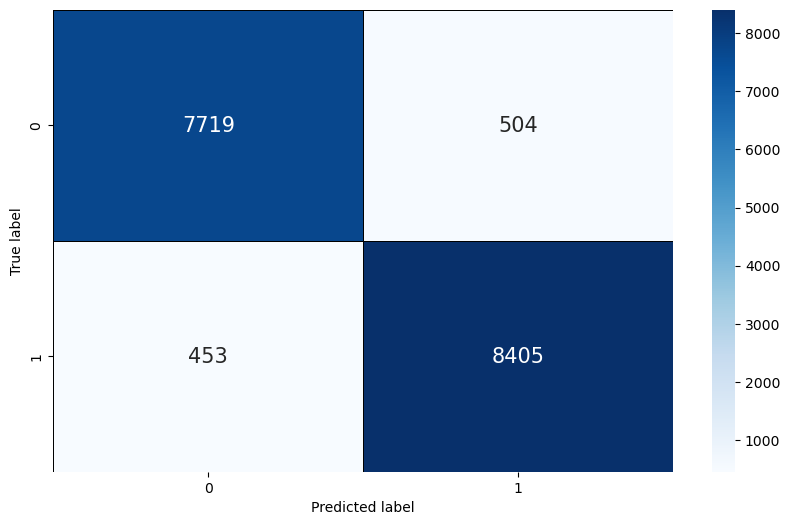

In [213]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_train_over, name='Actual')
y_pred = pd.Series(y_train_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

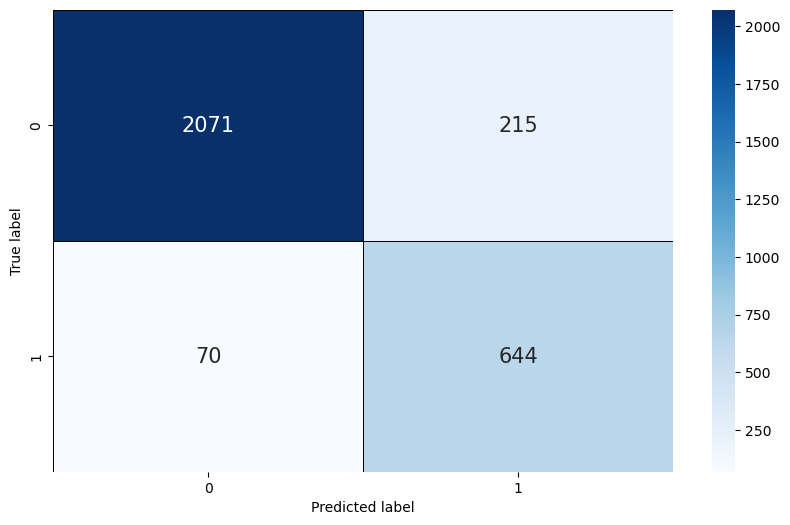

In [214]:
plt.figure(figsize=(10,6))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

## Comparing Models

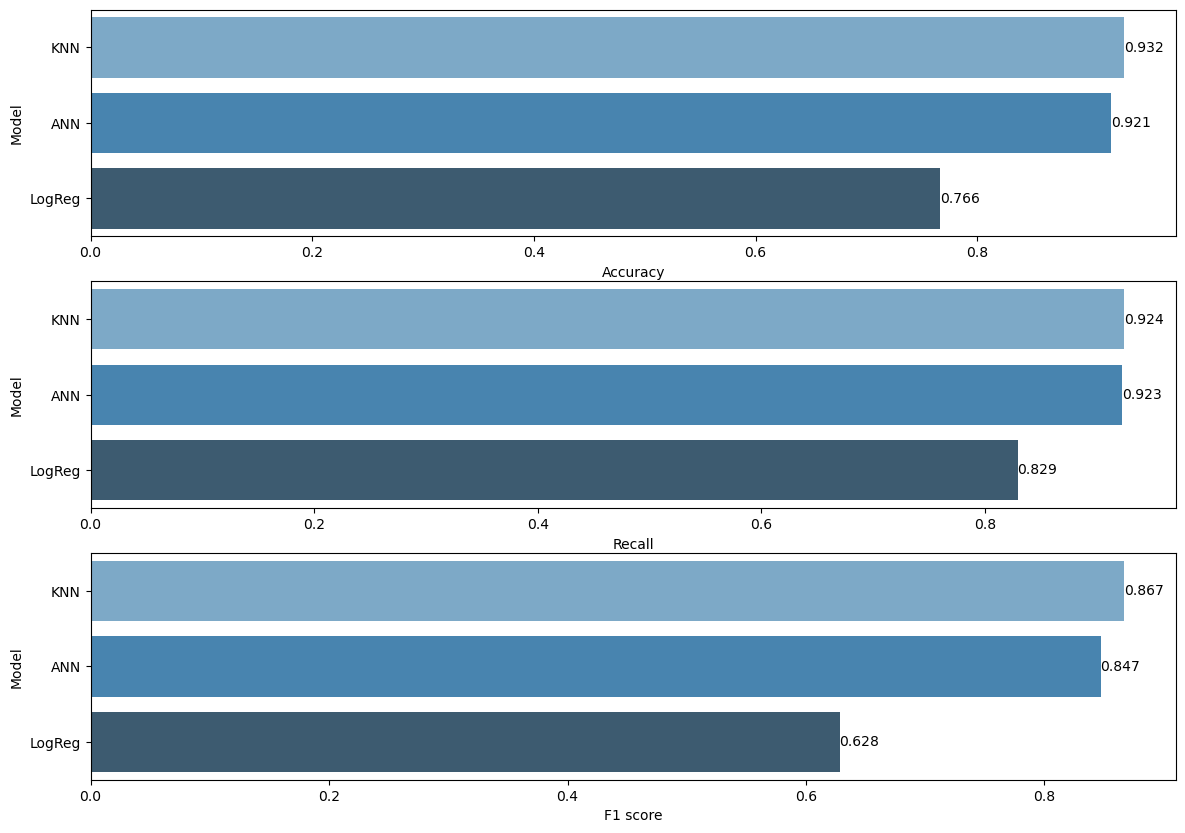

In [215]:
compare = pd.DataFrame({"Model": ["LogReg", "KNN", "ANN"],
                        "Accuracy": [log_ac,knn_ac,ann_ac],
                        "Recall": [log_recall,knn_recall,ann_recall],
                       "F1 score": [log_f1,knn_f1, ann_f1]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))

plt.subplot(311)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="F1 score", ascending=False)
ax=sns.barplot(x="F1 score", y="Model", data=compare, palette="Blues_d")
labels(ax)


# Model Deployement

In [216]:
import pickle

In [217]:
X_imp=df[["satisfaction_level", "number_project", "time_spend_company", "average_montly_hours", "last_evaluation"]]
X_imp.head()

,satisfaction_level,number_project,time_spend_company,average_montly_hours,last_evaluation
0,0.38,2,3,157,0.53
1,0.80,5,6,262,0.86
2,0.11,7,4,272,0.88
3,0.72,5,5,223,0.87
4,0.37,2,3,159,0.52


In [218]:
final_model=RandomForestClassifier(n_estimators=200, max_depth=30, 
                                min_samples_split=2, criterion='gini', random_state=42)
final_model.fit(X_imp,y)

NameError: name 'RandomForestClassifier' is not defined

**Save and Export the Model**

In [ ]:
pickle.dump(final_model, open("final_model_hr", 'wb'))

**Save and Export Variables**


In [ ]:
my_dict = {"satisfaction_level": [0.5, 0.68, 0.98],
           "number_project": [6, 6, 7],
           "time_spend_company": [5, 6, 9],
           "average_montly_hours": [180, 230, 280],
           "last_evaluation":[0.67,0.96,0.98]
          }

In [ ]:
sample = pd.DataFrame(my_dict)
sample

In [ ]:
final_model = pickle.load(open("final_model_hr", "rb"))

In [ ]:
predictions = final_model.predict(sample)
predictions

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___